# ОЗО-500. Модель с учётои всех элементов конструкции дефектоскопа, включая ярма секций

Цель: оценить степень влияния на показатели эффективности ОЗО следующих компонентов:
- сердечник обмотки
- ширнир
- корпуса секций дефектоскопа

![OZO-500-273.jpg](OZO500\pic\OZO-500-273.jpg )
![OZO-500-700.jpg](OZO500\pic\OZO-500-700.jpg)


# 1 ОЗО-500-700. Пересчёт эталонных параметров
в прошлой работе расчёт эталонных параметров был неверным, поскольу на трубе 700 мм применялась модель OZO-500-273.

Нужно расчитать эталонные параметрпы заново.

**Результаты и обсуждение**

1) Новые эталонные параметры следующие 
    + Мощность активных потерь = 0.319 Вт
    + Напряжённость магнитного поля на расстоянии 1 м от трубы = 3.44e-02 А/м

Без учёта корпусов дефектоскопа эти праметры равны 0.328 Вт и 2.97e-02 А/м соответственно. Таким образом, корпуса дефектоскопов увеличиваю напряжённость поля на 10%.


![OZO-500-700.jpg](OZO500\pic\OZO-500-700.jpg)
![OZO-500-700_FEM.jpg](OZO500\pic\OZO-500-700_FEM.jpg)

## 1.1 Седечник 12Х18Н10Т - пересчёт эталонных праметров

In [5]:
from ozo_class_1 import *
# ============================ OZO. Создание объекта на 700 мм =============================
Coil500 = Coil(outerDiameter = 0.161, innerDiameter = 0.135, length = 0.069, wireDiameter = 0.83e-3)
PIG700 = PIG(pipeOuterDiameter = 0.700, pipeWall = 0.010, modelName = 'OZO500\OZO-500-700.FEM', voltage = 12, freq = 22,
             meshsize = 1, materials = {'Сердечник':'12H18N10T', 'Дефектоскоп':'1010 Steel', 'Труба':'17G1S'})
OZO500_700 = OZO(Coil = Coil500, PIG = PIG700)

<<<  1st step  (0.830 mm) x 949 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 14.0 Ом, (949витков)
        Длина провода = 441.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.58e-02 А/м
<<<  2nd step  (0.83 mm) x 949 витков  >>>

        nominalCurrent = Ufund = 0.115 А, wireDiameter = 0.830
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.93e-02 А/м


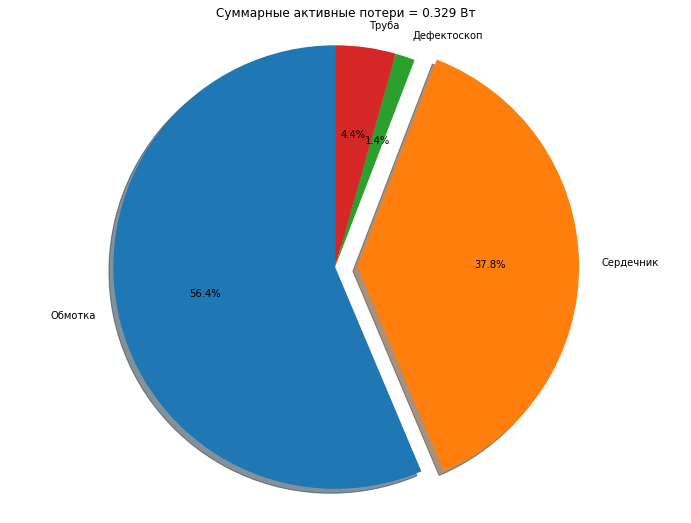

In [6]:
%matplotlib inline
CoilFieldIntensityAt1m, CoilInductatce, ActiveImpedanceNames, ActiveImpedance, ActivePowerLoss,\
CoilVoltageDrop, NominalCurrent = OZO500_700.CalculateModel2Steps()

In [7]:
OZO500_700.printTZ()

----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.93e-02 А/м

1. Материалы
    ['Сердечник: 12H18N10T', 'Дефектоскоп: 1010 Steel', 'Труба: 17G1S']
2. Геометрические параметры ОЗО
    2.1 Катушка
        Внешний диаметр катушки = 161.0 мм
        Внутренний диаметр катушки = 135.0 мм
        Длина катушки = 69.0 мм
    2.2 Труба
        Внешний диаметр трубы = 700.0 мм
        Толщина стенки = 10.0 мм
3. Параметры обмотки
        Диаметр провода = 0.83 мм
        Количество витков = 949
        Длина провода = 441.2 м
4. Источник питания
        Частота = 22 Гц
        Амплитуда напряжения = 12 В
5. Параметры ОЗО
    5.1 Импеданс излучателя в трубе на снаряде
        Активный = 24.952 Ом
        Индуктивный = 502.429 мГн
    5.2 Мощность активных потерь = 0.329 Вт (критерий < 0.329 Вт)
    5.3 Напряжённость магнитного поля на расстоянии 1 м от трубы = 5.93e-02 А/м (критерий > 5.93e-02 А/м)



## 1.2 Седечник Сталь 10 - расчёт без изменения параметров обмотки
Вывод: если заменить материал сердечника с 12Х18Н10Т на сталь 10 (не меняя обмотку), то это приведёт к следующим изменениям:
- снижению потерь в 1.78 раза
- снижению поля в 1.34 раза

Седечник Сталь 10 при прочих равных условиях [**'Сердечник: '1010 Steel'**, 'Дефектоскоп: 1010 Steel', 'Труба: 17G1S']

    5.2 Мощность активных потерь = 0.193 Вт (критерий < 0.329 Вт)
    5.3 Напряжённость магнитного поля на расстоянии 1 м от трубы = 2.45e-02 А/м (критерий > 3.28e-02 А/м)
  
Влияние секций снаряда ['Сердечник: 12H18N10T', **'Дефектоскоп: Air'**, 'Труба: 17G1S']

    5.2 Мощность активных потерь = 0.343 Вт (критерий < 0.329 Вт)
    5.3 Напряжённость магнитного поля на расстоянии 1 м от трубы = 3.01e-02 А/м (критерий > 3.28e-02 А/м)

In [8]:
Coil500 = Coil(outerDiameter = 0.161, innerDiameter = 0.135, length = 0.069, wireDiameter = 0.83e-3)
PIG700_2 = PIG(pipeOuterDiameter = 0.700, pipeWall = 0.010, modelName = 'OZO500\OZO-500-700.FEM', voltage = 12, freq = 22,
             meshsize = 1, materials = {'Сердечник':'1010 Steel', 'Дефектоскоп':'1010 Steel', 'Труба':'17G1S'})
OZO500_700_2 = OZO(Coil = Coil500, PIG = PIG700_2)

<<<  1st step  (0.830 mm) x 949 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 14.0 Ом, (949витков)
        Длина провода = 441.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.58e-02 А/м
<<<  2nd step  (0.83 mm) x 949 витков  >>>

        nominalCurrent = Ufund = 0.115 А, wireDiameter = 0.830
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.93e-02 А/м


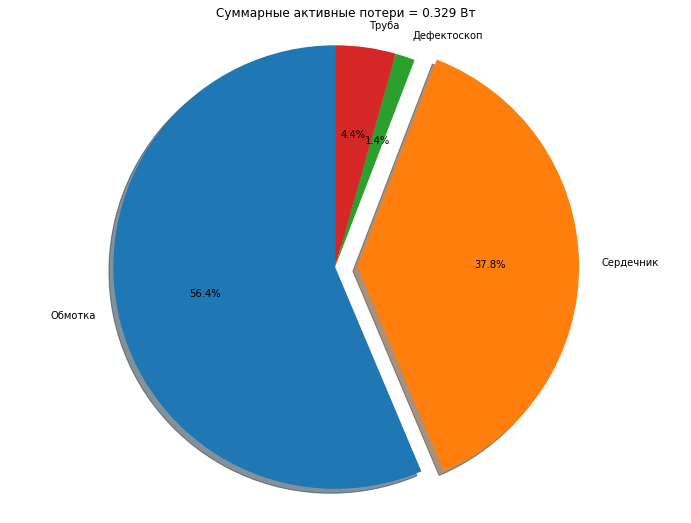

In [9]:
%matplotlib inline
CoilFieldIntensityAt1m, CoilInductatce, ActiveImpedanceNames, ActiveImpedance, ActivePowerLoss,\
CoilVoltageDrop, NominalCurrent = OZO500_700.CalculateModel2Steps()

In [6]:
OZO500_700_2.printTZ()

----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.68e-02 А/м

1. Материалы
    ['Сердечник: 1010 Steel', 'Дефектоскоп: 1010 Steel', 'Труба: 17G1S']
2. Геометрические параметры ОЗО
    2.1 Катушка
        Внешний диаметр катушки = 161.0 мм
        Внутренний диаметр катушки = 135.0 мм
        Длина катушки = 69.0 мм
    2.2 Труба
        Внешний диаметр трубы = 700.0 мм
        Толщина стенки = 10.0 мм
3. Параметры обмотки
        Диаметр провода = 0.83 мм
        Количество витков = 949
        Длина провода = 441.2 м
4. Источник питания
        Частота = 22 Гц
        Амплитуда напряжения = 12 В
5. Параметры ОЗО
    5.1 Импеданс излучателя в трубе на снаряде
        Активный = 27.622 Ом
        Индуктивный = 738.591 мГн
    5.2 Мощность активных потерь = 0.178 Вт (критерий < 0.329 Вт)
    5.3 Напряжённость магнитного поля на расстоянии 1 м от трубы = 4.68e-02 А/м (критерий > 5.93e-02 А/м)



## 1.3 Оптимизация обмотки. Сердечник - сталь10
Вывод: если заменить материал сердечника с 12Х18Н10Т (провод 0,83 мм) на сталь 10 (провод 0,95 мм),
то это приведёт к следующим изменениям:
- снижению потерь в 1.04 раза
- росту поля в 1.06 раза

In [37]:
# OZO500_700_2.Coil.Wire.DiameterList

In [7]:
from ozo_class import * 
# ==================================== OZO-219. Создание объекта =====================================
Coil500_700 = Coil(OuterDiameter = 0.161, InnerDiameter = 0.135, Length = 0.069, WireDiameter = 0.83e-3,
               PipeOuterDiameter = 0.700, PipeWall = 0.010)
OZO500_700 = OZO(ModelName = 'OZO500\OZO-500-700.FEM', Voltage = 12, Coil = Coil500_700,
            Мaterials = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'},meshsize = 1)

OZO500_700.Freq = 22
d = {'Материал сердечника':[],'Диаметр провода, мм':[],'H(1 м), А/м':[],'Активные потери, Вт':[],'R, Ом':[],'L, мГн':[]}
print(OZO500_700.Coil.Wire.DiameterList[40:70])

[0.77, 0.8, 0.83, 0.85, 0.9, 0.93, 0.95, 1, 1.06, 1.08, 1.12, 1.18, 1.25, 1.32, 1.4, 1.45, 1.5, 1.56, 1.6, 1.7, 1.8, 1.9, 2, 2.12, 2.24, 2.36, 2.44, 2.5]


<<<  1st step  (0.770 mm) x 1103 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 18.9 Ом, (1103витков)
        Длина провода = 512.85, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.00e-02 А/м
<<<  2nd step  (0.77 mm) x 1103 витков  >>>

        NominalCurrent = Ufund = 0.085 А,
        PowerLossRealExp=3.379 Вт, PowerLossApparentExp = 3.421 Вт,
        WireDiameter = 0.770
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.11e-02 А/м


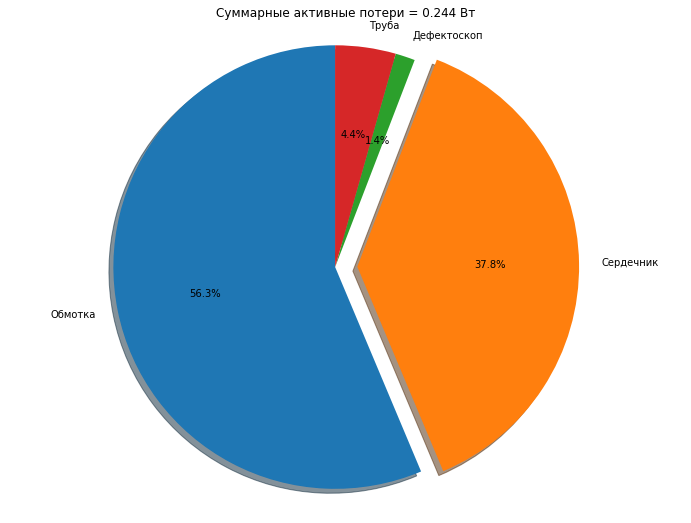

<<<--- Сердечник=12H18N10T, Провод(0.77), R=33.708 Ом, L=678.886 мГн
<<<  1st step  (0.800 mm) x 1022 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 16.3 Ом, (1022витков)
        Длина провода = 475.18, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.78e-02 А/м
<<<  2nd step  (0.8 mm) x 1022 витков  >>>

        NominalCurrent = Ufund = 0.099 А,
        PowerLossRealExp=3.935 Вт, PowerLossApparentExp = 3.985 Вт,
        WireDiameter = 0.800
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.51e-02 А/м


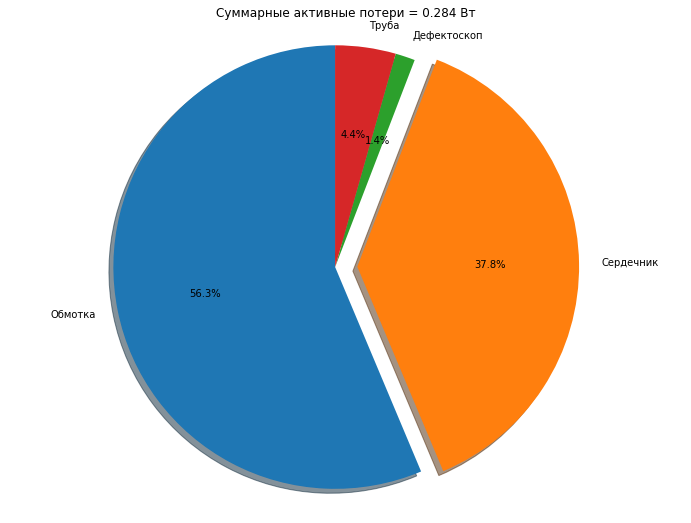

<<<--- Сердечник=12H18N10T, Провод(0.8), R=28.934 Ом, L=582.775 мГн
<<<  1st step  (0.830 mm) x 949 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 14.0 Ом, (949витков)
        Длина провода = 441.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.58e-02 А/м
<<<  2nd step  (0.83 mm) x 949 витков  >>>

        NominalCurrent = Ufund = 0.115 А,
        PowerLossRealExp=4.564 Вт, PowerLossApparentExp = 4.621 Вт,
        WireDiameter = 0.830
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.93e-02 А/м


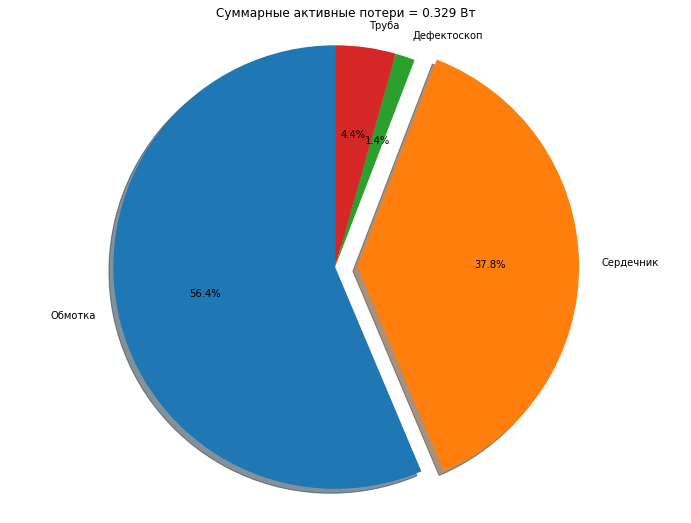

<<<--- Сердечник=12H18N10T, Провод(0.83), R=24.952 Ом, L=502.429 мГн
<<<  1st step  (0.850 mm) x 905 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 12.8 Ом, (905витков)
        Длина провода = 420.78, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.46e-02 А/м
<<<  2nd step  (0.85 mm) x 905 витков  >>>

        NominalCurrent = Ufund = 0.126 А,
        PowerLossRealExp=5.019 Вт, PowerLossApparentExp = 5.082 Вт,
        WireDiameter = 0.850
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.22e-02 А/м


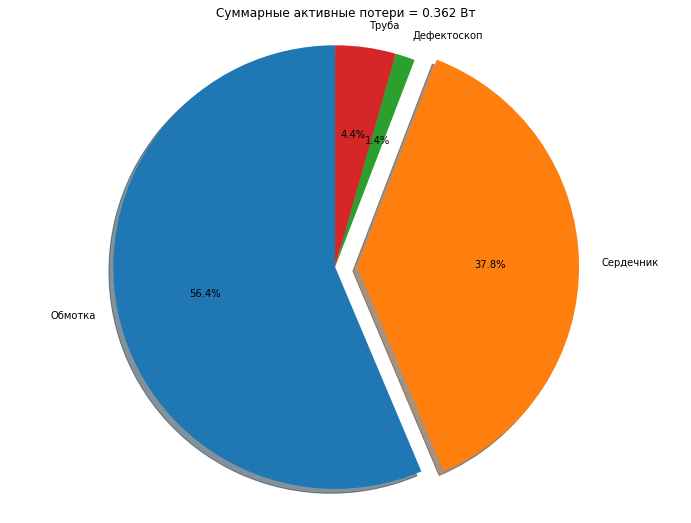

<<<--- Сердечник=12H18N10T, Провод(0.85), R=22.688 Ом, L=456.874 мГн
<<<  1st step  (0.900 mm) x 807 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 10.1 Ом, (807витков)
        Длина провода = 375.22, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.20e-02 А/м
<<<  2nd step  (0.9000000000000001 mm) x 807 витков  >>>

        NominalCurrent = Ufund = 0.159 А,
        PowerLossRealExp=6.312 Вт, PowerLossApparentExp = 6.390 Вт,
        WireDiameter = 0.900
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.97e-02 А/м


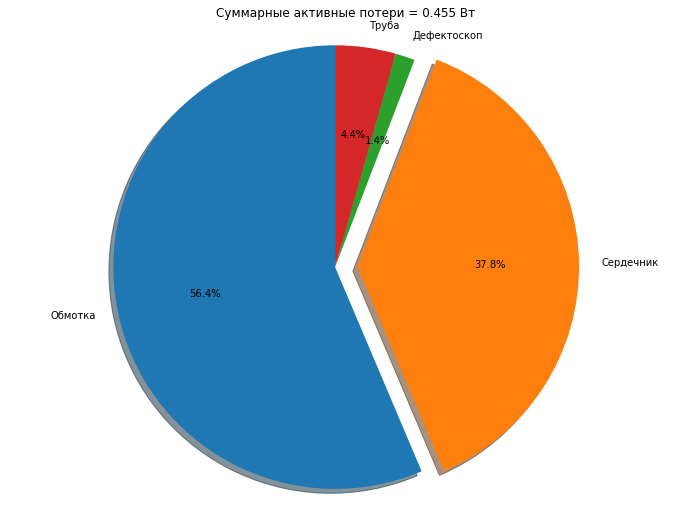

<<<--- Сердечник=12H18N10T, Провод(0.9), R=18.038 Ом, L=363.176 мГн
<<<  1st step  (0.930 mm) x 756 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 8.9 Ом, (756витков)
        Длина провода = 351.51, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.06e-02 А/м
<<<  2nd step  (0.93 mm) x 756 витков  >>>

        NominalCurrent = Ufund = 0.181 А,
        PowerLossRealExp=7.192 Вт, PowerLossApparentExp = 7.282 Вт,
        WireDiameter = 0.930
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.44e-02 А/м


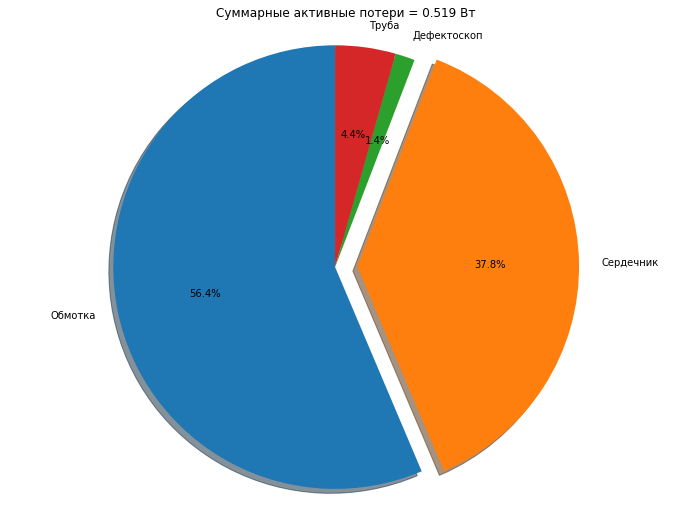

<<<--- Сердечник=12H18N10T, Провод(0.93), R=15.824 Ом, L=318.655 мГн
<<<  1st step  (0.950 mm) x 725 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 8.18 Ом, (725витков)
        Длина провода = 337.09, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.97e-02 А/м
<<<  2nd step  (0.95 mm) x 725 витков  >>>

        NominalCurrent = Ufund = 0.197 А,
        PowerLossRealExp=7.819 Вт, PowerLossApparentExp = 7.919 Вт,
        WireDiameter = 0.950
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.76e-02 А/м


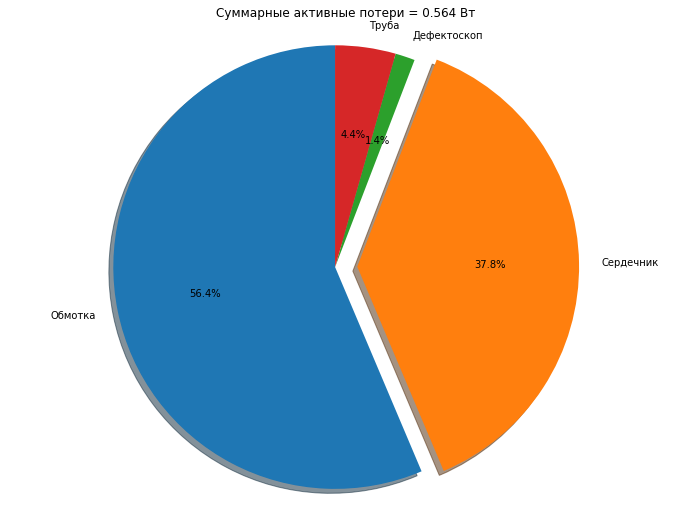

<<<--- Сердечник=12H18N10T, Провод(0.95), R=14.545 Ом, L=293.011 мГн
<<<  1st step  (1.000 mm) x 654 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 6.66 Ом, (654витков)
        Длина провода = 304.08, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.78e-02 А/м
<<<  2nd step  (1.0 mm) x 654 витков  >>>

        NominalCurrent = Ufund = 0.242 А,
        PowerLossRealExp=9.609 Вт, PowerLossApparentExp = 9.730 Вт,
        WireDiameter = 1.000
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 8.60e-02 А/м


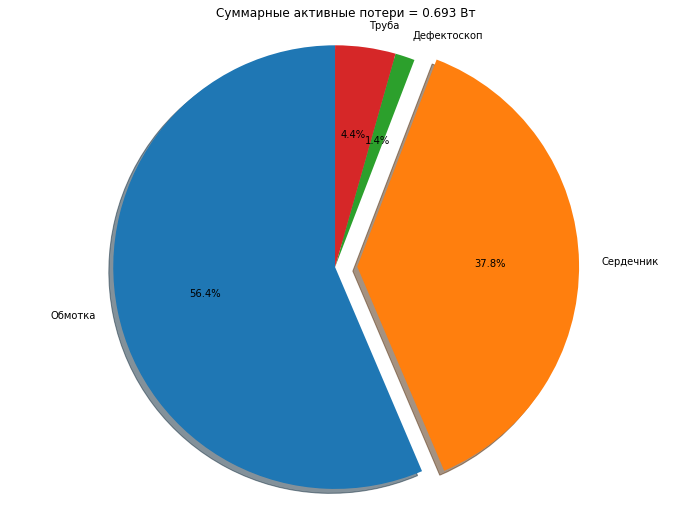

<<<--- Сердечник=12H18N10T, Провод(1), R=11.834 Ом, L=238.323 мГн
<<<  1st step  (1.060 mm) x 582 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 5.27 Ом, (582витков)
        Длина провода = 270.60, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.58e-02 А/м
<<<  2nd step  (1.0600000000000003 mm) x 582 витков  >>>

        NominalCurrent = Ufund = 0.306 А,
        PowerLossRealExp=12.134 Вт, PowerLossApparentExp = 12.287 Вт,
        WireDiameter = 1.060
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 9.65e-02 А/м


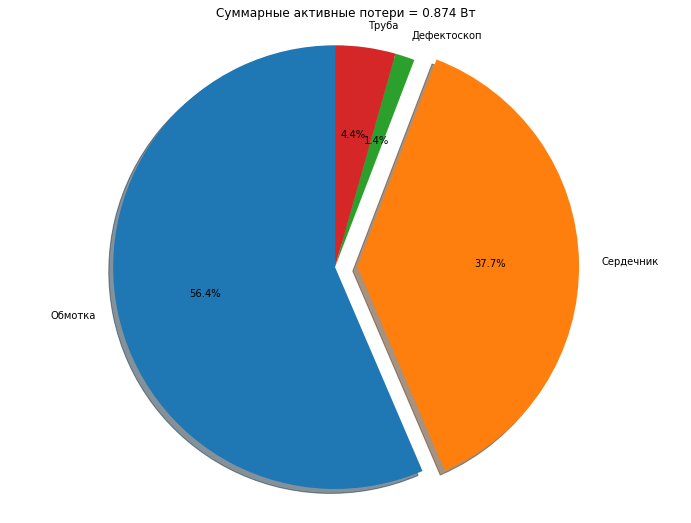

<<<--- Сердечник=12H18N10T, Провод(1.06), R=9.367 Ом, L=188.612 мГн
<<<  1st step  (1.080 mm) x 561 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 4.9 Ом, (561витков)
        Длина провода = 260.84, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.53e-02 А/м
<<<  2nd step  (1.08 mm) x 561 витков  >>>

        NominalCurrent = Ufund = 0.329 А,
        PowerLossRealExp=13.058 Вт, PowerLossApparentExp = 13.225 Вт,
        WireDiameter = 1.080
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.00e-01 А/м


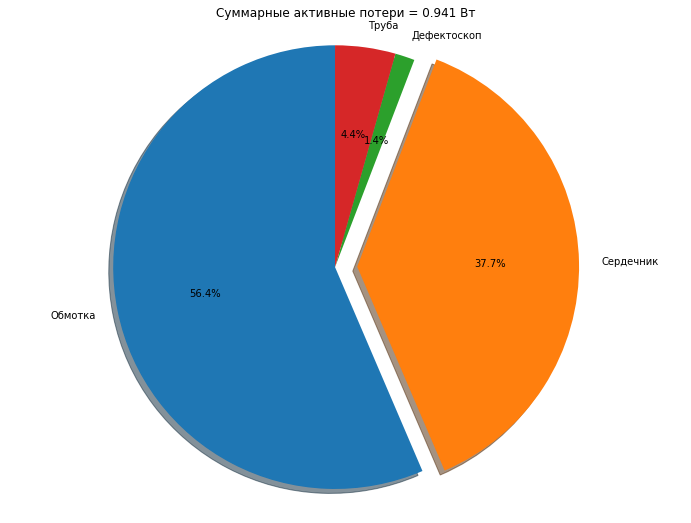

<<<--- Сердечник=12H18N10T, Провод(1.08), R=8.698 Ом, L=175.203 мГн
<<<  1st step  (1.120 mm) x 521 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 4.23 Ом, (521витков)
        Длина провода = 242.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.42e-02 А/м
<<<  2nd step  (1.12 mm) x 521 витков  >>>

        NominalCurrent = Ufund = 0.381 А,
        PowerLossRealExp=15.143 Вт, PowerLossApparentExp = 15.330 Вт,
        WireDiameter = 1.120
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.08e-01 А/м


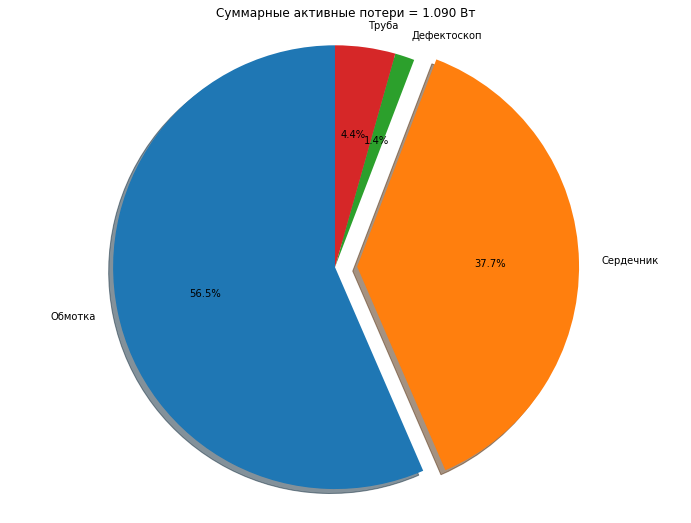

<<<--- Сердечник=12H18N10T, Провод(1.12), R=7.503 Ом, L=151.025 мГн
<<<  1st step  (1.180 mm) x 469 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 3.43 Ом, (469витков)
        Длина провода = 218.06, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.28e-02 А/м
<<<  2nd step  (1.1800000000000002 mm) x 469 витков  >>>

        NominalCurrent = Ufund = 0.470 А,
        PowerLossRealExp=18.690 Вт, PowerLossApparentExp = 18.916 Вт,
        WireDiameter = 1.180
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.19e-01 А/м


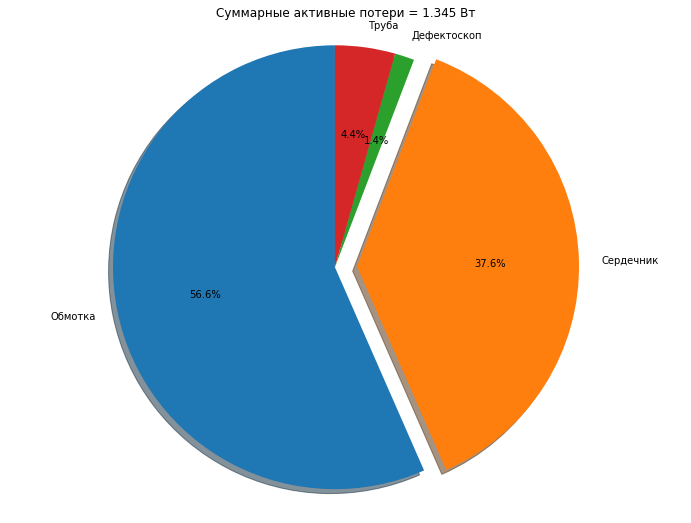

<<<--- Сердечник=12H18N10T, Провод(1.18), R=6.077 Ом, L=122.265 мГн
<<<  1st step  (1.250 mm) x 418 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 2.72 Ом, (418витков)
        Длина провода = 194.35, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.14e-02 А/м
<<<  2nd step  (1.25 mm) x 418 витков  >>>

        NominalCurrent = Ufund = 0.592 А,
        PowerLossRealExp=23.528 Вт, PowerLossApparentExp = 23.813 Вт,
        WireDiameter = 1.250
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.34e-01 А/м


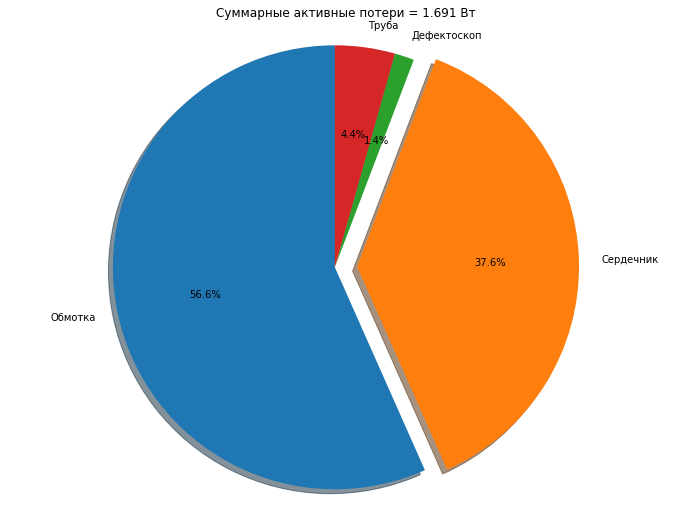

<<<--- Сердечник=12H18N10T, Провод(1.25), R=4.821 Ом, L=96.991 мГн
<<<  1st step  (1.320 mm) x 375 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 2.19 Ом, (375витков)
        Длина провода = 174.36, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.02e-02 А/м
<<<  2nd step  (1.32 mm) x 375 витков  >>>

        NominalCurrent = Ufund = 0.736 А,
        PowerLossRealExp=29.231 Вт, PowerLossApparentExp = 29.590 Вт,
        WireDiameter = 1.320
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.49e-01 А/м


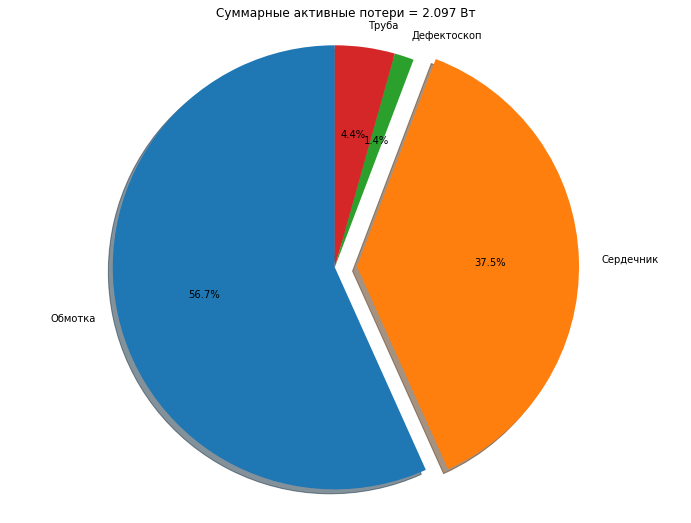

<<<--- Сердечник=12H18N10T, Провод(1.32), R=3.873 Ом, L=77.939 мГн
<<<  1st step  (1.400 mm) x 333 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.73 Ом, (333витков)
        Длина провода = 154.83, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 9.07e-03 А/м
<<<  2nd step  (1.4 mm) x 333 витков  >>>

        NominalCurrent = Ufund = 0.933 А,
        PowerLossRealExp=37.077 Вт, PowerLossApparentExp = 37.517 Вт,
        WireDiameter = 1.400
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.67e-01 А/м


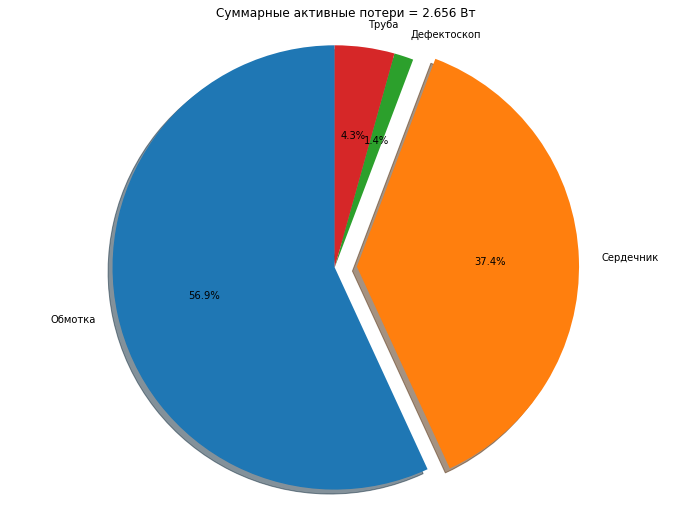

<<<--- Сердечник=12H18N10T, Провод(1.4), R=3.050 Ом, L=61.324 мГн
<<<  1st step  (1.450 mm) x 311 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.51 Ом, (311витков)
        Длина провода = 144.60, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 8.47e-03 А/м
<<<  2nd step  (1.45 mm) x 311 витков  >>>

        NominalCurrent = Ufund = 1.070 А,
        PowerLossRealExp=42.494 Вт, PowerLossApparentExp = 43.026 Вт,
        WireDiameter = 1.450
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.79e-01 А/м


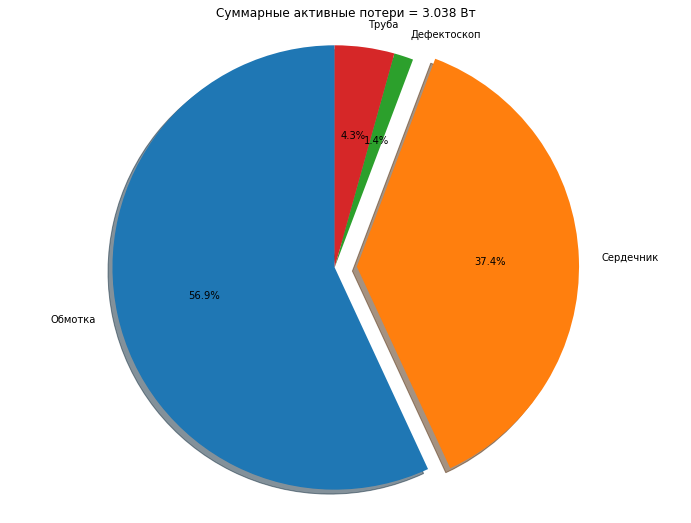

<<<--- Сердечник=12H18N10T, Провод(1.45), R=2.654 Ом, L=53.407 мГн
<<<  1st step  (1.500 mm) x 290 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.31 Ом, (290витков)
        Длина провода = 134.84, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.90e-03 А/м
<<<  2nd step  (1.5 mm) x 290 витков  >>>

        NominalCurrent = Ufund = 1.230 А,
        PowerLossRealExp=48.890 Вт, PowerLossApparentExp = 49.465 Вт,
        WireDiameter = 1.500
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.91e-01 А/м


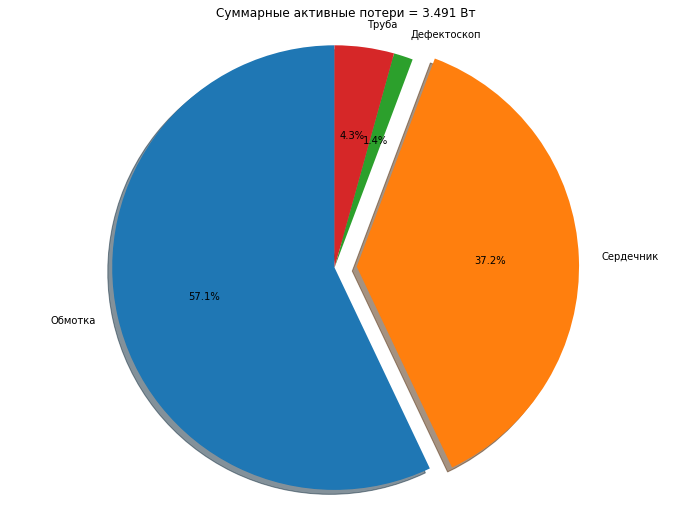

<<<--- Сердечник=12H18N10T, Провод(1.5), R=2.306 Ом, L=46.355 мГн
<<<  1st step  (1.560 mm) x 268 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.12 Ом, (268витков)
        Длина провода = 124.61, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.30e-03 А/м
<<<  2nd step  (1.5600000000000003 mm) x 268 витков  >>>

        NominalCurrent = Ufund = 1.441 А,
        PowerLossRealExp=57.251 Вт, PowerLossApparentExp = 57.914 Вт,
        WireDiameter = 1.560
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.06e-01 А/м


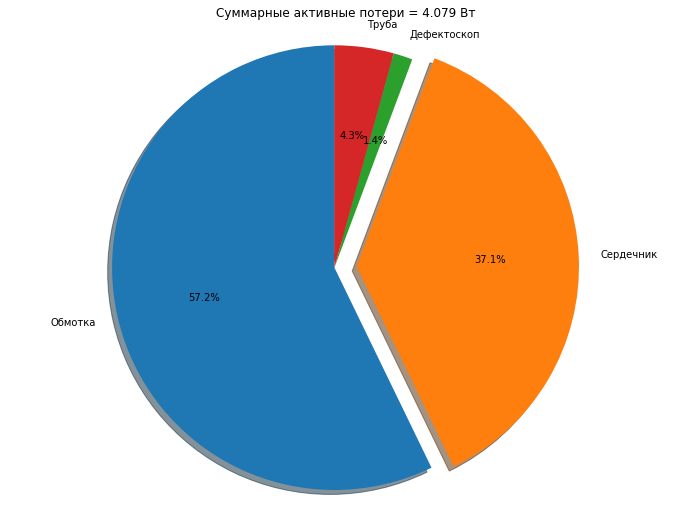

<<<--- Сердечник=12H18N10T, Провод(1.56), R=1.966 Ом, L=39.494 мГн
<<<  1st step  (1.600 mm) x 255 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.01 Ом, (255витков)
        Длина провода = 118.56, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.94e-03 А/м
<<<  2nd step  (1.6 mm) x 255 витков  >>>

        NominalCurrent = Ufund = 1.591 А,
        PowerLossRealExp=63.227 Вт, PowerLossApparentExp = 63.980 Вт,
        WireDiameter = 1.600
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.16e-01 А/м


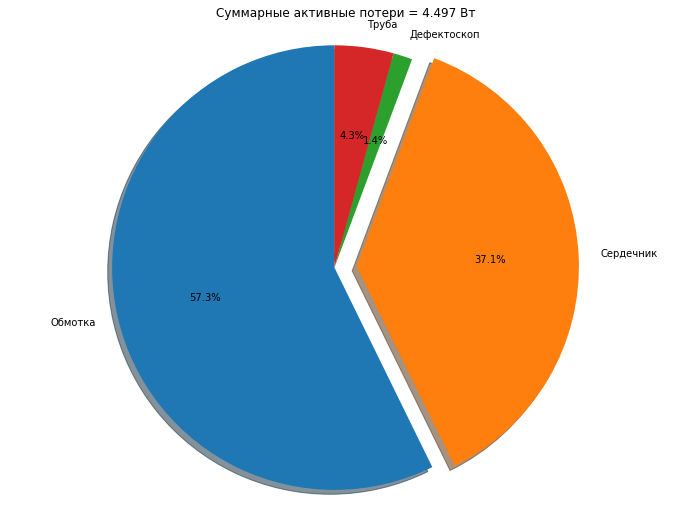

<<<--- Сердечник=12H18N10T, Провод(1.6), R=1.776 Ом, L=35.695 мГн
<<<  1st step  (1.700 mm) x 226 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.796 Ом, (226витков)
        Длина провода = 105.08, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.15e-03 А/м
<<<  2nd step  (1.7 mm) x 226 витков  >>>

        NominalCurrent = Ufund = 2.026 А,
        PowerLossRealExp=80.487 Вт, PowerLossApparentExp = 81.460 Вт,
        WireDiameter = 1.700
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.42e-01 А/м


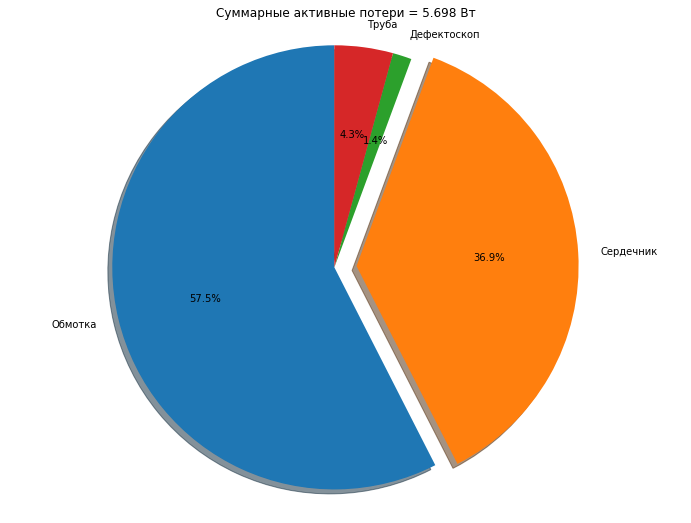

<<<--- Сердечник=12H18N10T, Провод(1.7), R=1.388 Ом, L=27.898 мГн
<<<  1st step  (1.800 mm) x 201 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.632 Ом, (201витков)
        Длина провода = 93.46, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.47e-03 А/м
<<<  2nd step  (1.8000000000000003 mm) x 201 витков  >>>

        NominalCurrent = Ufund = 2.561 А,
        PowerLossRealExp=101.807 Вт, PowerLossApparentExp = 102.931 Вт,
        WireDiameter = 1.800
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.70e-01 А/м


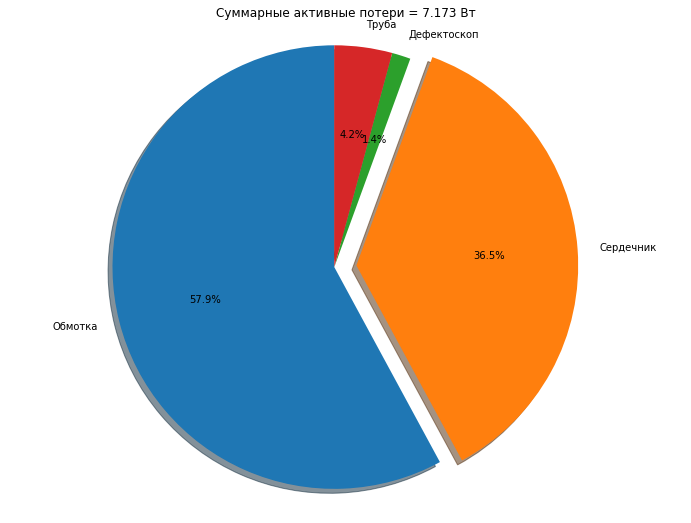

<<<--- Сердечник=12H18N10T, Провод(1.8), R=1.094 Ом, L=21.931 мГн
<<<  1st step  (1.900 mm) x 181 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.511 Ом, (181витков)
        Длина провода = 84.16, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.93e-03 А/м
<<<  2nd step  (1.9 mm) x 181 витков  >>>

        NominalCurrent = Ufund = 3.159 А,
        PowerLossRealExp=125.475 Вт, PowerLossApparentExp = 127.008 Вт,
        WireDiameter = 1.900
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.98e-01 А/м


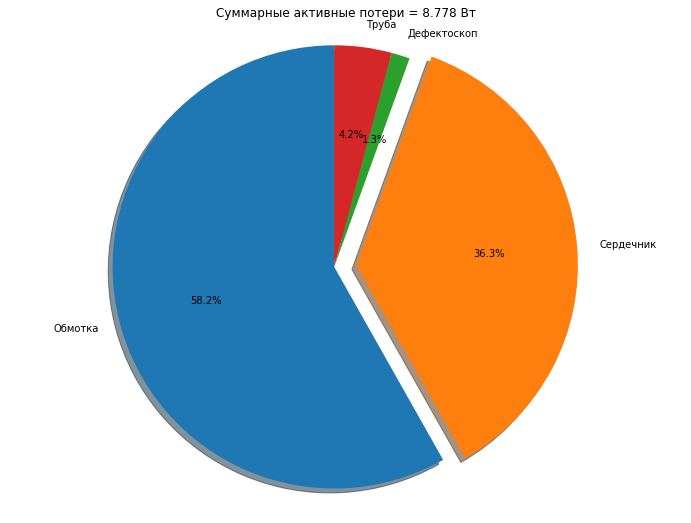

<<<--- Сердечник=12H18N10T, Провод(1.9), R=0.880 Ом, L=17.660 мГн
<<<  1st step  (2.000 mm) x 163 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.415 Ом, (163витков)
        Длина провода = 75.79, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.44e-03 А/м
<<<  2nd step  (2.0 mm) x 163 витков  >>>

        NominalCurrent = Ufund = 3.894 А,
        PowerLossRealExp=154.777 Вт, PowerLossApparentExp = 156.548 Вт,
        WireDiameter = 2.000
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.27e-01 А/м


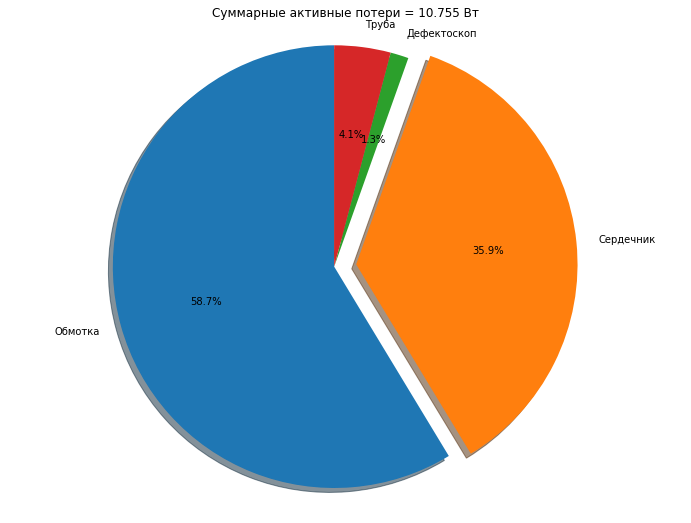

<<<--- Сердечник=12H18N10T, Провод(2), R=0.709 Ом, L=14.200 мГн
<<<  1st step  (2.120 mm) x 145 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.329 Ом, (145витков)
        Длина провода = 67.42, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.95e-03 А/м
<<<  2nd step  (2.1200000000000006 mm) x 145 витков  >>>

        NominalCurrent = Ufund = 4.921 А,
        PowerLossRealExp=195.608 Вт, PowerLossApparentExp = 197.810 Вт,
        WireDiameter = 2.120
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.62e-01 А/м


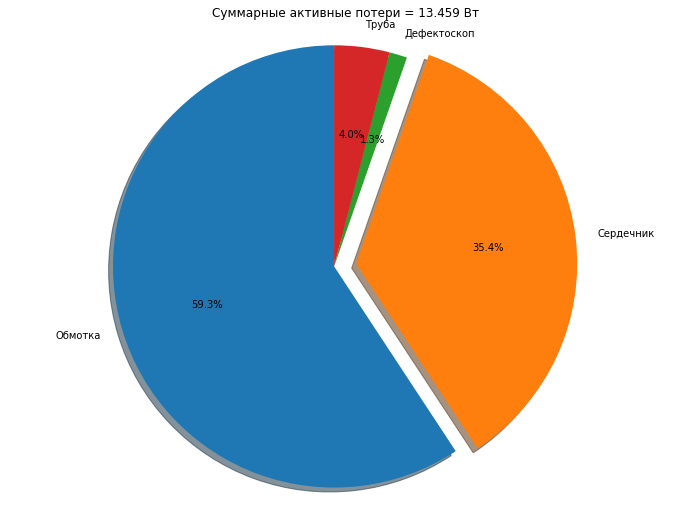

<<<--- Сердечник=12H18N10T, Провод(2.12), R=0.556 Ом, L=11.106 мГн
<<<  1st step  (2.240 mm) x 130 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.264 Ом, (130витков)
        Длина провода = 60.44, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.54e-03 А/м
<<<  2nd step  (2.24 mm) x 130 витков  >>>

        NominalCurrent = Ufund = 6.122 А,
        PowerLossRealExp=243.315 Вт, PowerLossApparentExp = 246.130 Вт,
        WireDiameter = 2.240
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.98e-01 А/м


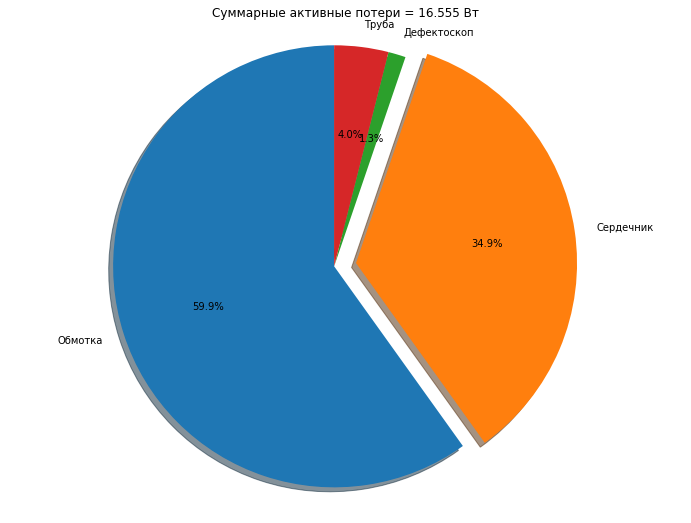

<<<--- Сердечник=12H18N10T, Провод(2.24), R=0.442 Ом, L=8.809 мГн
<<<  1st step  (2.360 mm) x 117 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.214 Ом, (117витков)
        Длина провода = 54.40, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.19e-03 А/м
<<<  2nd step  (2.3600000000000003 mm) x 117 витков  >>>

        NominalCurrent = Ufund = 7.558 А,
        PowerLossRealExp=300.443 Вт, PowerLossApparentExp = 303.810 Вт,
        WireDiameter = 2.360
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.34e-01 А/м


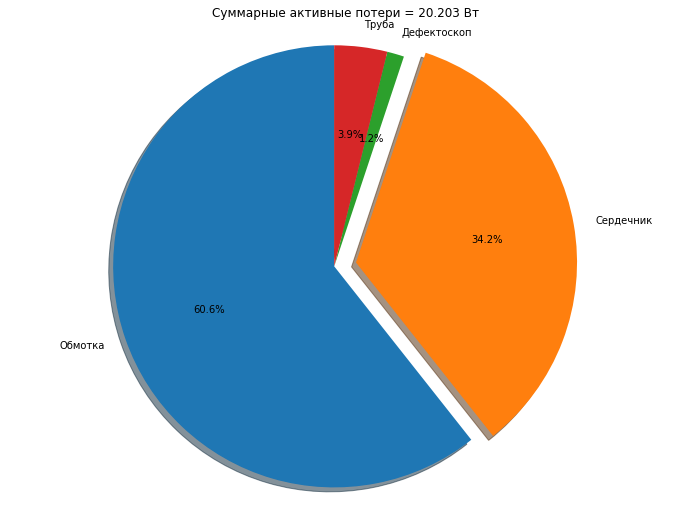

<<<--- Сердечник=12H18N10T, Провод(2.36), R=0.354 Ом, L=7.028 мГн
<<<  1st step  (2.440 mm) x 109 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.186 Ом, (109витков)
        Длина провода = 50.68, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.97e-03 А/м
<<<  2nd step  (2.44 mm) x 109 витков  >>>

        NominalCurrent = Ufund = 8.706 А,
        PowerLossRealExp=346.418 Вт, PowerLossApparentExp = 349.785 Вт,
        WireDiameter = 2.440
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.59e-01 А/м


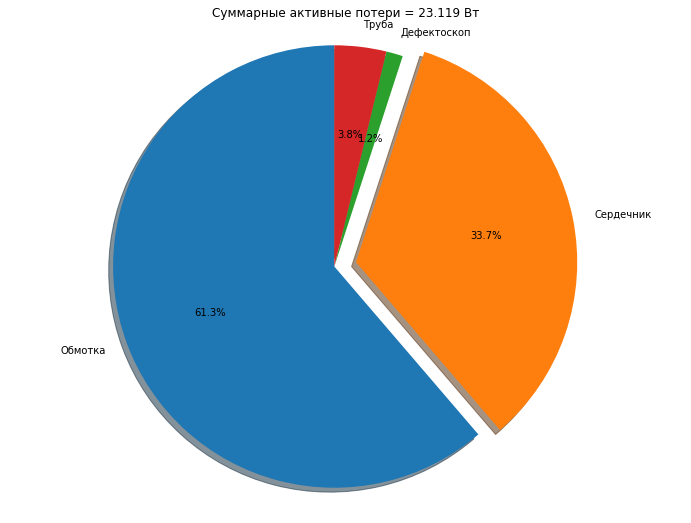

<<<--- Сердечник=12H18N10T, Провод(2.44), R=0.305 Ом, L=6.032 мГн
<<<  1st step  (2.500 mm) x 104 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.169 Ом, (104витков)
        Длина провода = 48.36, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.83e-03 А/м
<<<  2nd step  (2.5 mm) x 104 витков  >>>

        NominalCurrent = Ufund = 9.564 А,
        PowerLossRealExp=380.421 Вт, PowerLossApparentExp = 384.336 Вт,
        WireDiameter = 2.500
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.77e-01 А/м


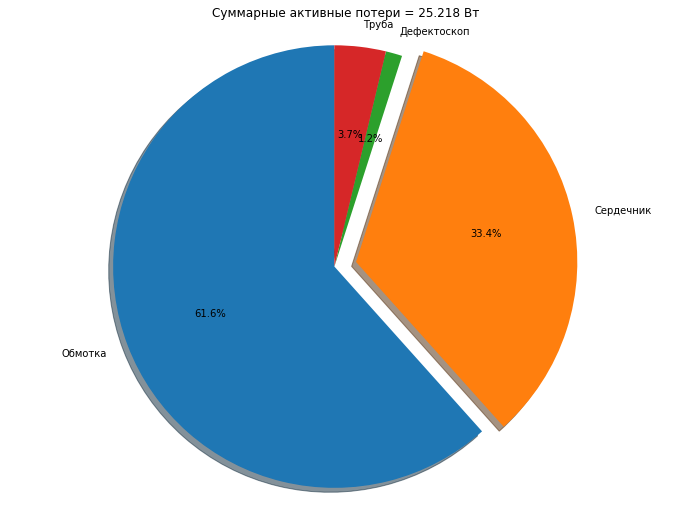

<<<--- Сердечник=12H18N10T, Провод(2.5), R=0.276 Ом, L=5.447 мГн
<<<  1st step  (0.770 mm) x 1103 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 18.9 Ом, (1103витков)
        Длина провода = 512.85, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.39e-02 А/м
<<<  2nd step  (0.77 mm) x 1103 витков  >>>

        NominalCurrent = Ufund = 0.059 А,
        PowerLossRealExp=2.060 Вт, PowerLossApparentExp = 2.519 Вт,
        WireDiameter = 0.770
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.03e-02 А/м


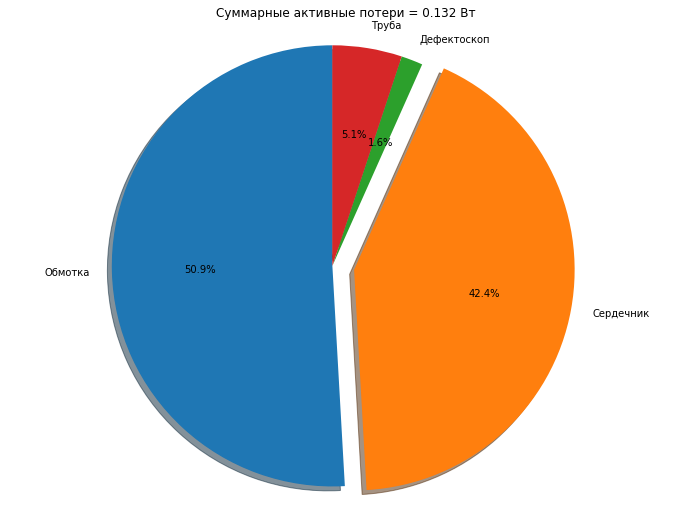

<<<--- Сердечник=1010 Steel, Провод(0.77), R=37.307 Ом, L=997.808 мГн
<<<  1st step  (0.800 mm) x 1022 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 16.3 Ом, (1022витков)
        Длина провода = 475.18, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.14e-02 А/м
<<<  2nd step  (0.8 mm) x 1022 витков  >>>

        NominalCurrent = Ufund = 0.069 А,
        PowerLossRealExp=2.400 Вт, PowerLossApparentExp = 2.934 Вт,
        WireDiameter = 0.800
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.35e-02 А/м


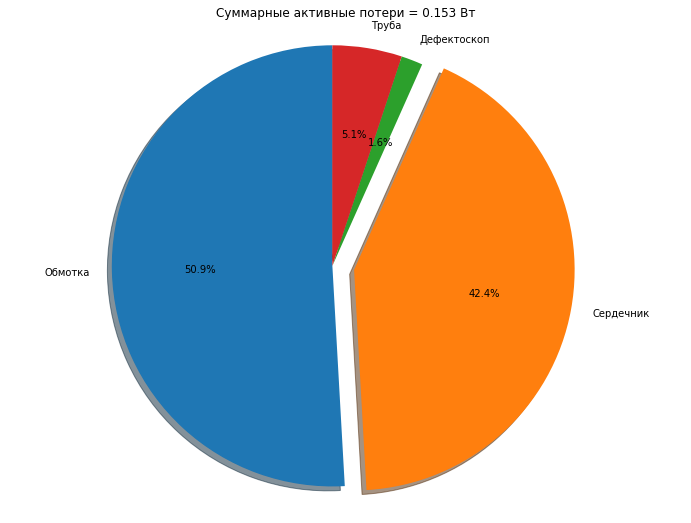

<<<--- Сердечник=1010 Steel, Провод(0.8), R=32.027 Ом, L=856.617 мГн
<<<  1st step  (0.830 mm) x 949 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 14.0 Ом, (949витков)
        Длина провода = 441.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.92e-02 А/м
<<<  2nd step  (0.83 mm) x 949 витков  >>>

        NominalCurrent = Ufund = 0.080 А,
        PowerLossRealExp=2.783 Вт, PowerLossApparentExp = 3.403 Вт,
        WireDiameter = 0.830
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.68e-02 А/м


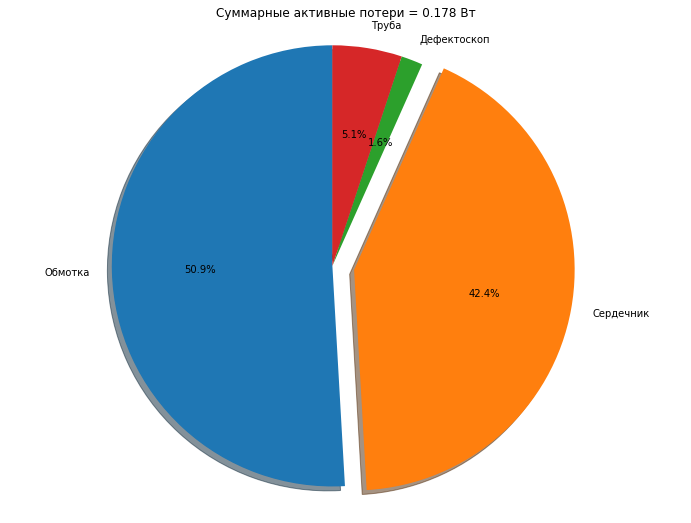

<<<--- Сердечник=1010 Steel, Провод(0.83), R=27.622 Ом, L=738.591 мГн
<<<  1st step  (0.850 mm) x 905 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 12.8 Ом, (905витков)
        Длина провода = 420.78, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.78e-02 А/м
<<<  2nd step  (0.85 mm) x 905 витков  >>>

        NominalCurrent = Ufund = 0.088 А,
        PowerLossRealExp=3.060 Вт, PowerLossApparentExp = 3.741 Вт,
        WireDiameter = 0.850
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.91e-02 А/м


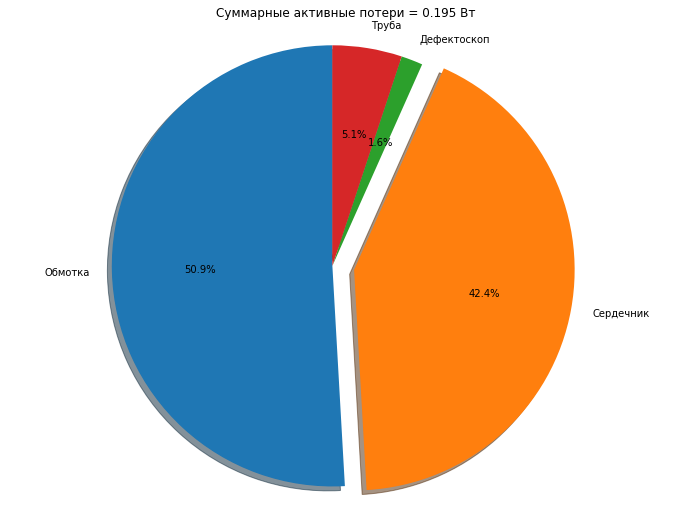

<<<--- Сердечник=1010 Steel, Провод(0.85), R=25.119 Ом, L=671.674 мГн
<<<  1st step  (0.900 mm) x 807 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 10.1 Ом, (807витков)
        Длина провода = 375.22, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.48e-02 А/м
<<<  2nd step  (0.9000000000000001 mm) x 807 витков  >>>

        NominalCurrent = Ufund = 0.111 А,
        PowerLossRealExp=3.849 Вт, PowerLossApparentExp = 4.705 Вт,
        WireDiameter = 0.900
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.50e-02 А/м


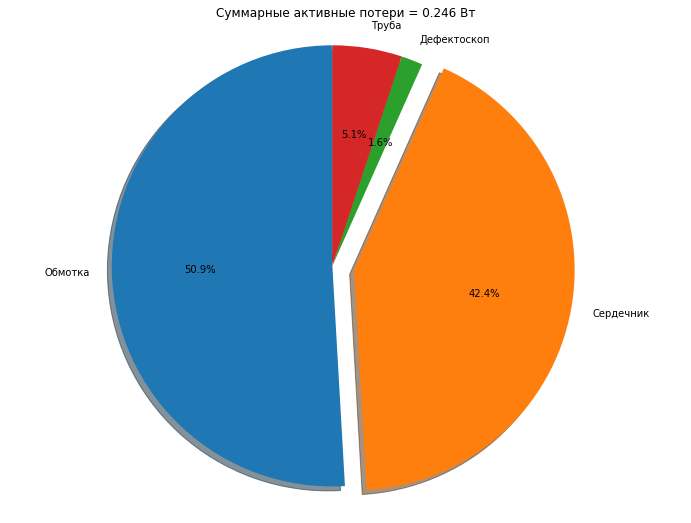

<<<--- Сердечник=1010 Steel, Провод(0.9), R=19.977 Ом, L=534.042 мГн
<<<  1st step  (0.930 mm) x 756 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 8.9 Ом, (756витков)
        Длина провода = 351.51, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.32e-02 А/м
<<<  2nd step  (0.93 mm) x 756 витков  >>>

        NominalCurrent = Ufund = 0.126 А,
        PowerLossRealExp=4.386 Вт, PowerLossApparentExp = 5.362 Вт,
        WireDiameter = 0.930
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.87e-02 А/м


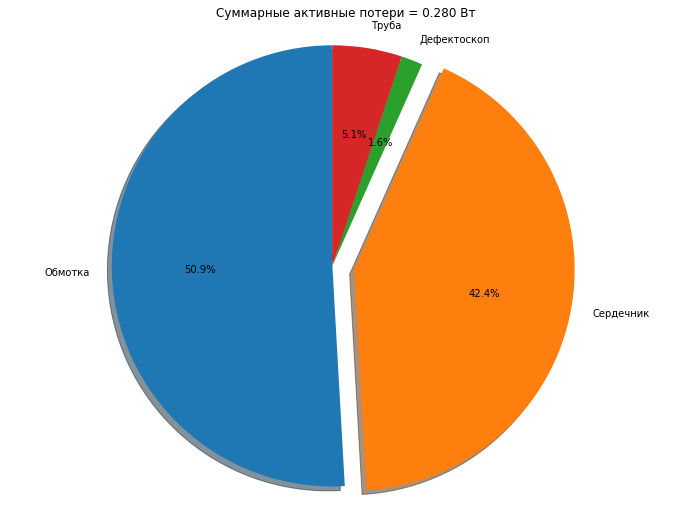

<<<--- Сердечник=1010 Steel, Провод(0.93), R=17.531 Ом, L=468.646 мГн
<<<  1st step  (0.950 mm) x 725 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 8.18 Ом, (725витков)
        Длина провода = 337.09, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.23e-02 А/м
<<<  2nd step  (0.95 mm) x 725 витков  >>>

        NominalCurrent = Ufund = 0.137 А,
        PowerLossRealExp=4.768 Вт, PowerLossApparentExp = 5.830 Вт,
        WireDiameter = 0.950
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.12e-02 А/м


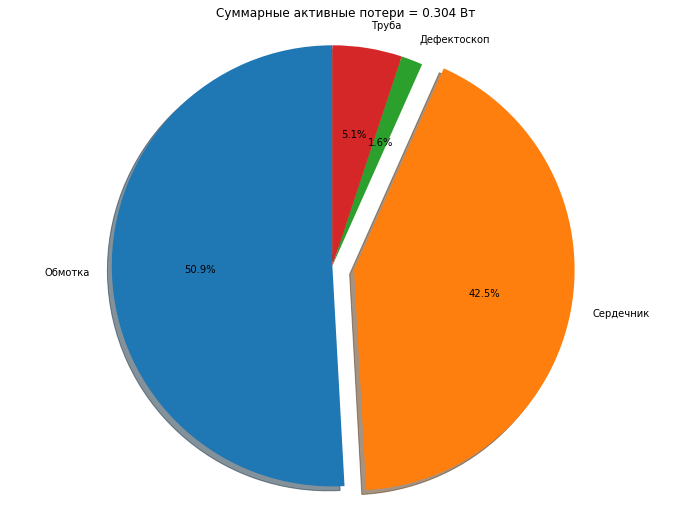

<<<--- Сердечник=1010 Steel, Провод(0.95), R=16.117 Ом, L=430.980 мГн
<<<  1st step  (1.000 mm) x 654 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 6.66 Ом, (654витков)
        Длина провода = 304.08, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.01e-02 А/м
<<<  2nd step  (1.0 mm) x 654 витков  >>>

        NominalCurrent = Ufund = 0.169 А,
        PowerLossRealExp=5.860 Вт, PowerLossApparentExp = 7.164 Вт,
        WireDiameter = 1.000
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.79e-02 А/м


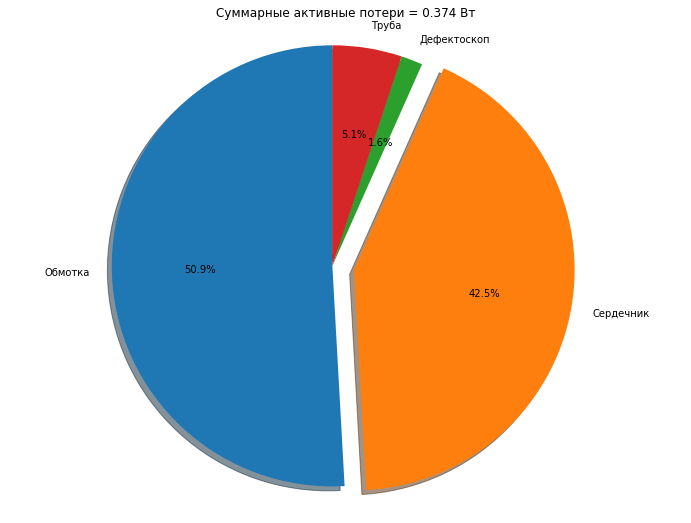

<<<--- Сердечник=1010 Steel, Провод(1), R=13.120 Ом, L=350.649 мГн
<<<  1st step  (1.060 mm) x 582 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 5.27 Ом, (582витков)
        Длина провода = 270.60, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.79e-02 А/м
<<<  2nd step  (1.0600000000000003 mm) x 582 витков  >>>

        NominalCurrent = Ufund = 0.213 А,
        PowerLossRealExp=7.400 Вт, PowerLossApparentExp = 9.047 Вт,
        WireDiameter = 1.060
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.62e-02 А/м


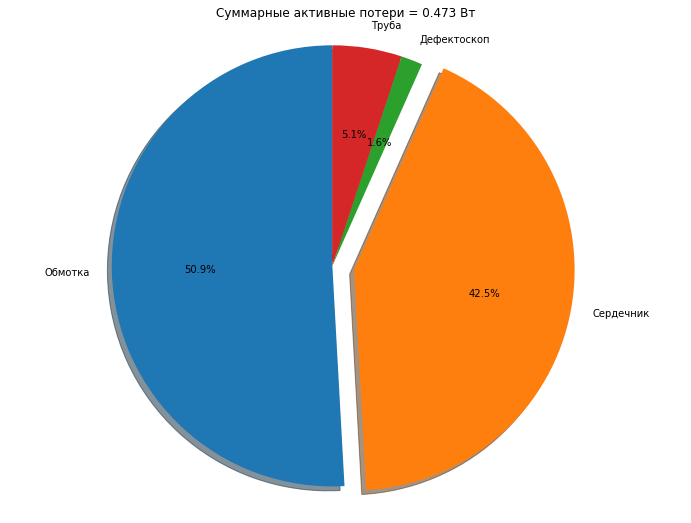

<<<--- Сердечник=1010 Steel, Провод(1.06), R=10.393 Ом, L=277.629 мГн
<<<  1st step  (1.080 mm) x 561 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 4.9 Ом, (561витков)
        Длина провода = 260.84, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.72e-02 А/м
<<<  2nd step  (1.08 mm) x 561 витков  >>>

        NominalCurrent = Ufund = 0.230 А,
        PowerLossRealExp=7.963 Вт, PowerLossApparentExp = 9.737 Вт,
        WireDiameter = 1.080
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.91e-02 А/м


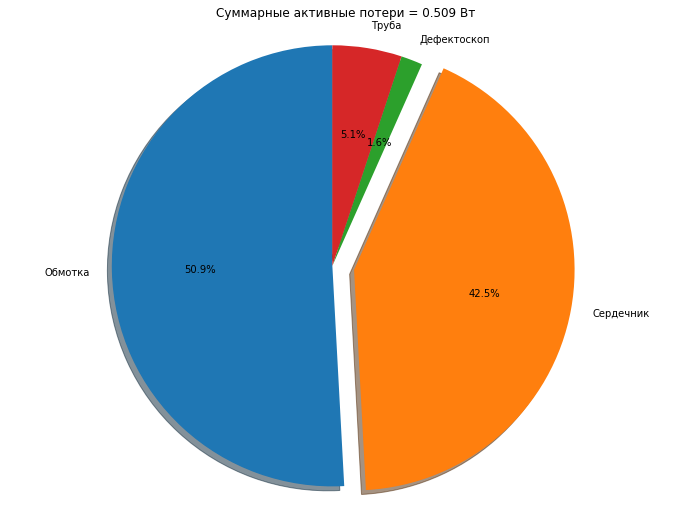

<<<--- Сердечник=1010 Steel, Провод(1.08), R=9.654 Ом, L=257.933 мГн
<<<  1st step  (1.120 mm) x 521 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 4.23 Ом, (521витков)
        Длина провода = 242.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.60e-02 А/м
<<<  2nd step  (1.12 mm) x 521 витков  >>>

        NominalCurrent = Ufund = 0.266 А,
        PowerLossRealExp=9.235 Вт, PowerLossApparentExp = 11.288 Вт,
        WireDiameter = 1.120
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 8.51e-02 А/м


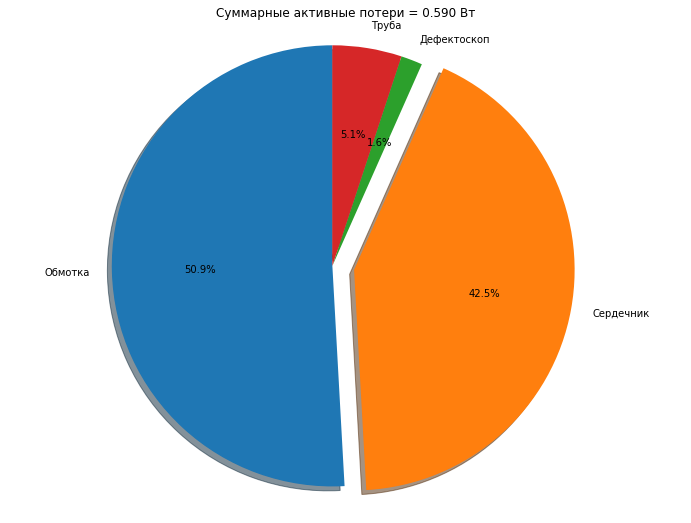

<<<--- Сердечник=1010 Steel, Провод(1.12), R=8.333 Ом, L=222.419 мГн
<<<  1st step  (1.180 mm) x 469 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 3.43 Ом, (469витков)
        Длина провода = 218.06, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.44e-02 А/м
<<<  2nd step  (1.1800000000000002 mm) x 469 витков  >>>

        NominalCurrent = Ufund = 0.328 А,
        PowerLossRealExp=11.398 Вт, PowerLossApparentExp = 13.929 Вт,
        WireDiameter = 1.180
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 9.45e-02 А/м


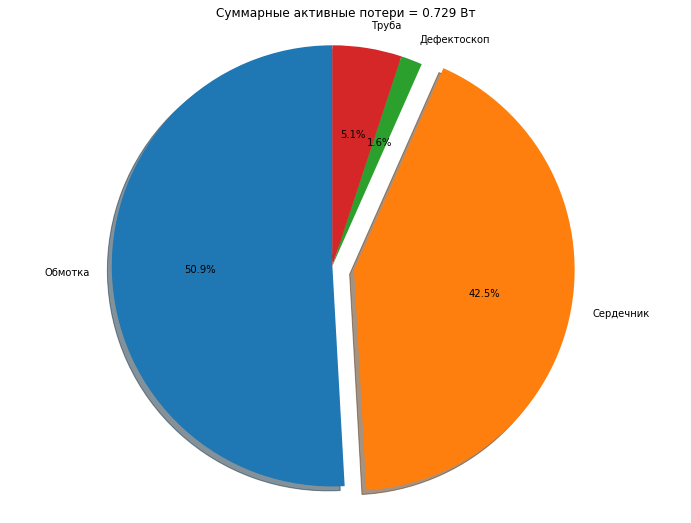

<<<--- Сердечник=1010 Steel, Провод(1.18), R=6.757 Ом, L=180.173 мГн
<<<  1st step  (1.250 mm) x 418 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 2.72 Ом, (418витков)
        Длина провода = 194.35, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.29e-02 А/м
<<<  2nd step  (1.25 mm) x 418 витков  >>>

        NominalCurrent = Ufund = 0.413 А,
        PowerLossRealExp=14.349 Вт, PowerLossApparentExp = 17.535 Вт,
        WireDiameter = 1.250
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.06e-01 А/м


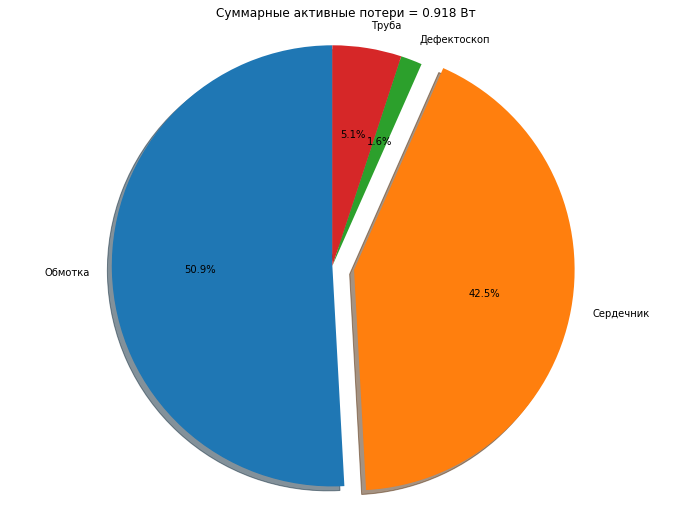

<<<--- Сердечник=1010 Steel, Провод(1.25), R=5.369 Ом, L=143.048 мГн
<<<  1st step  (1.320 mm) x 375 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 2.19 Ом, (375витков)
        Длина провода = 174.36, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.15e-02 А/м
<<<  2nd step  (1.32 mm) x 375 витков  >>>

        NominalCurrent = Ufund = 0.514 А,
        PowerLossRealExp=17.827 Вт, PowerLossApparentExp = 21.788 Вт,
        WireDiameter = 1.320
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.18e-01 А/м


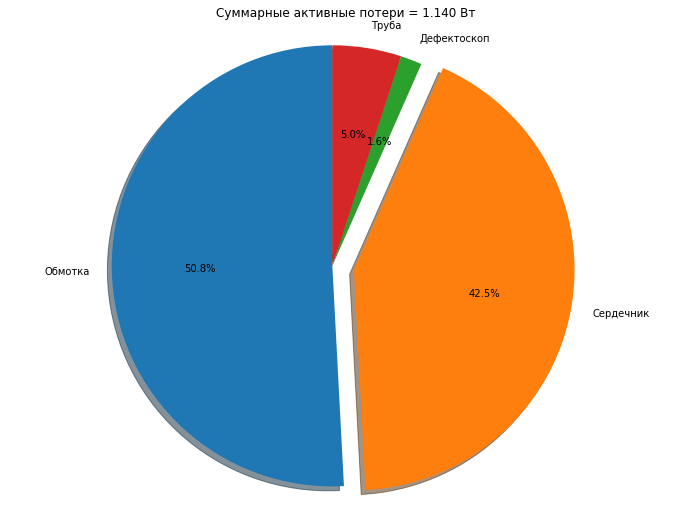

<<<--- Сердечник=1010 Steel, Провод(1.32), R=4.322 Ом, L=115.062 мГн
<<<  1st step  (1.400 mm) x 333 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.73 Ом, (333витков)
        Длина провода = 154.83, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.02e-02 А/м
<<<  2nd step  (1.4 mm) x 333 витков  >>>

        NominalCurrent = Ufund = 0.651 А,
        PowerLossRealExp=22.613 Вт, PowerLossApparentExp = 27.627 Вт,
        WireDiameter = 1.400
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.33e-01 А/м


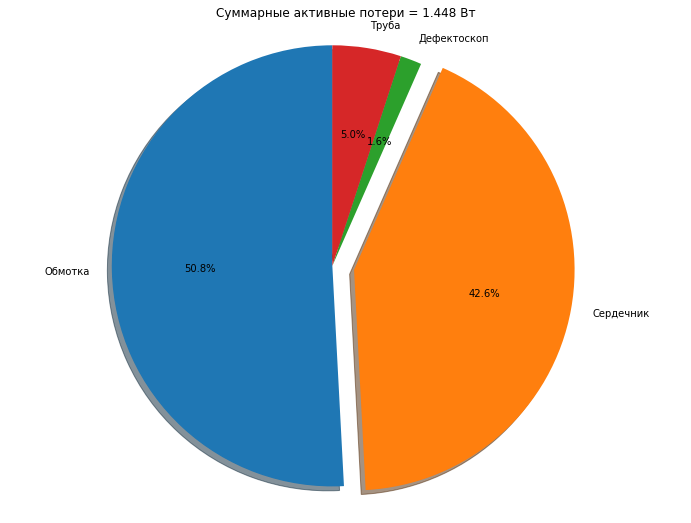

<<<--- Сердечник=1010 Steel, Провод(1.4), R=3.412 Ом, L=90.656 мГн
<<<  1st step  (1.450 mm) x 311 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.51 Ом, (311витков)
        Длина провода = 144.60, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 9.56e-03 А/м
<<<  2nd step  (1.45 mm) x 311 витков  >>>

        NominalCurrent = Ufund = 0.747 А,
        PowerLossRealExp=25.914 Вт, PowerLossApparentExp = 31.681 Вт,
        WireDiameter = 1.450
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.42e-01 А/м


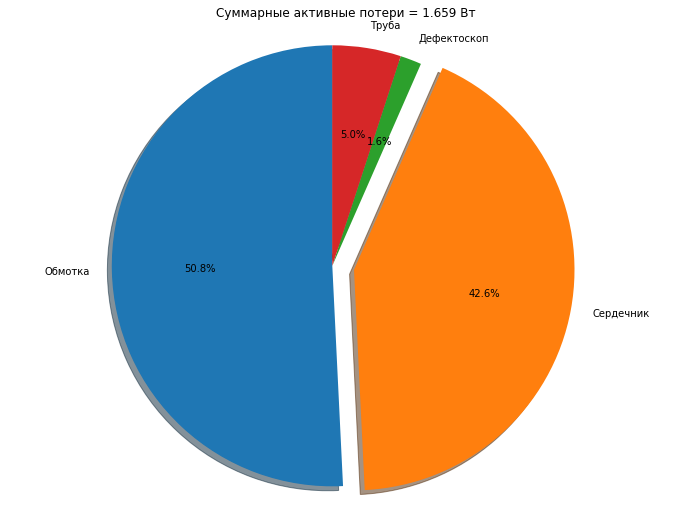

<<<--- Сердечник=1010 Steel, Провод(1.45), R=2.974 Ом, L=79.027 мГн
<<<  1st step  (1.500 mm) x 290 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.31 Ом, (290витков)
        Длина провода = 134.84, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 8.92e-03 А/м
<<<  2nd step  (1.5 mm) x 290 витков  >>>

        NominalCurrent = Ufund = 0.859 А,
        PowerLossRealExp=29.818 Вт, PowerLossApparentExp = 36.425 Вт,
        WireDiameter = 1.500
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.52e-01 А/м


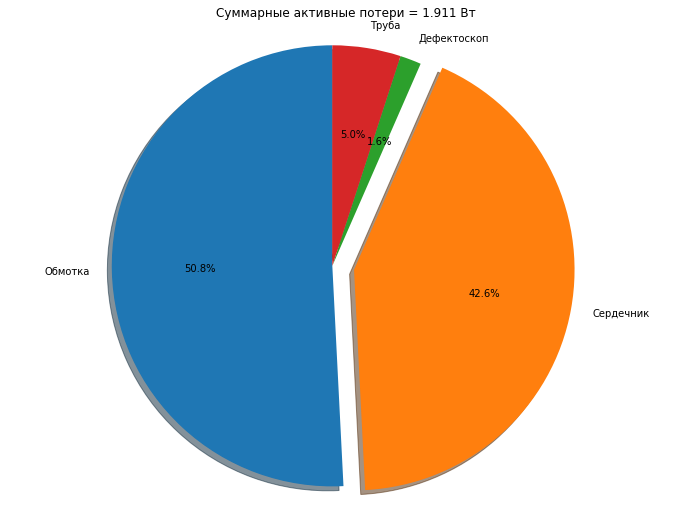

<<<--- Сердечник=1010 Steel, Провод(1.5), R=2.590 Ом, L=68.667 мГн
<<<  1st step  (1.560 mm) x 268 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.12 Ом, (268витков)
        Длина провода = 124.61, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 8.24e-03 А/м
<<<  2nd step  (1.5600000000000003 mm) x 268 витков  >>>

        NominalCurrent = Ufund = 1.006 А,
        PowerLossRealExp=34.918 Вт, PowerLossApparentExp = 42.649 Вт,
        WireDiameter = 1.560
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.64e-01 А/м


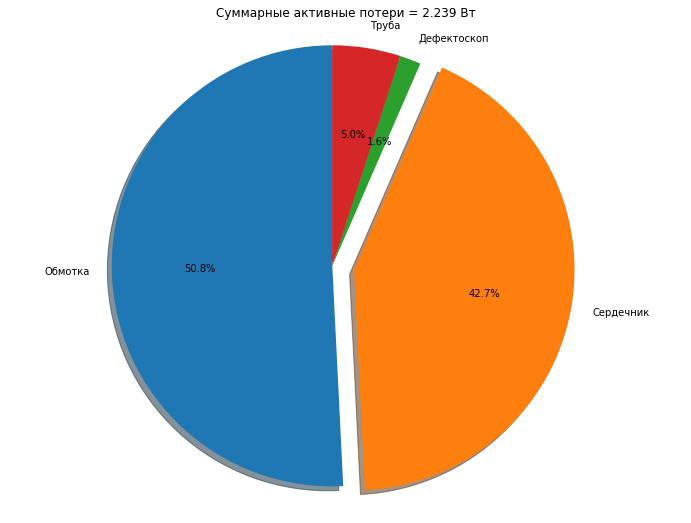

<<<--- Сердечник=1010 Steel, Провод(1.56), R=2.214 Ом, L=58.591 мГн
<<<  1st step  (1.600 mm) x 255 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 1.01 Ом, (255витков)
        Длина провода = 118.56, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.84e-03 А/м
<<<  2nd step  (1.6 mm) x 255 витков  >>>

        NominalCurrent = Ufund = 1.111 А,
        PowerLossRealExp=38.561 Вт, PowerLossApparentExp = 47.113 Вт,
        WireDiameter = 1.600
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.73e-01 А/м


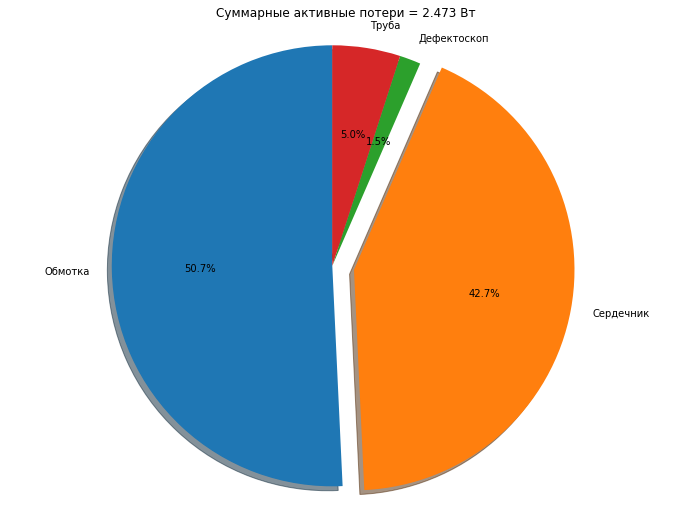

<<<--- Сердечник=1010 Steel, Провод(1.6), R=2.004 Ом, L=53.010 мГн
<<<  1st step  (1.700 mm) x 226 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.796 Ом, (226витков)
        Длина провода = 105.08, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.95e-03 А/м
<<<  2nd step  (1.7 mm) x 226 витков  >>>

        NominalCurrent = Ufund = 1.414 А,
        PowerLossRealExp=49.087 Вт, PowerLossApparentExp = 59.983 Вт,
        WireDiameter = 1.700
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.94e-01 А/м


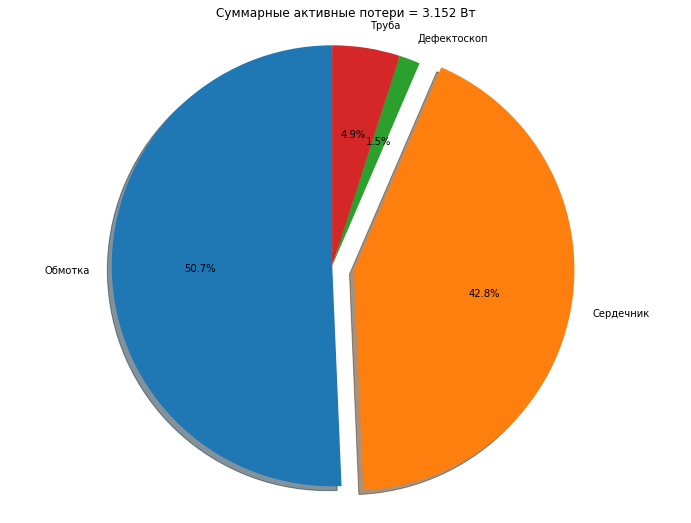

<<<--- Сердечник=1010 Steel, Провод(1.7), R=1.576 Ом, L=41.560 мГн
<<<  1st step  (1.800 mm) x 201 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.632 Ом, (201витков)
        Длина провода = 93.46, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.18e-03 А/м
<<<  2nd step  (1.8000000000000003 mm) x 201 витков  >>>

        NominalCurrent = Ufund = 1.788 А,
        PowerLossRealExp=62.099 Вт, PowerLossApparentExp = 75.805 Вт,
        WireDiameter = 1.800
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.18e-01 А/м


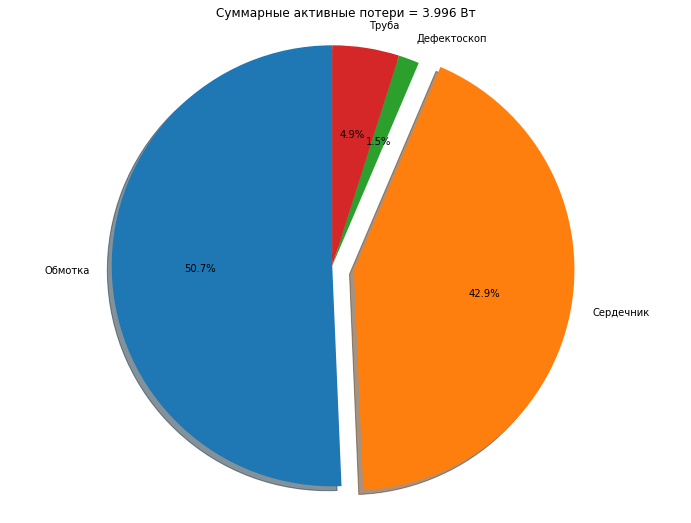

<<<--- Сердечник=1010 Steel, Провод(1.8), R=1.250 Ом, L=32.797 мГн
<<<  1st step  (1.900 mm) x 181 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.511 Ом, (181витков)
        Длина провода = 84.16, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.56e-03 А/м
<<<  2nd step  (1.9 mm) x 181 витков  >>>

        NominalCurrent = Ufund = 2.205 А,
        PowerLossRealExp=76.522 Вт, PowerLossApparentExp = 93.521 Вт,
        WireDiameter = 1.900
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.41e-01 А/м


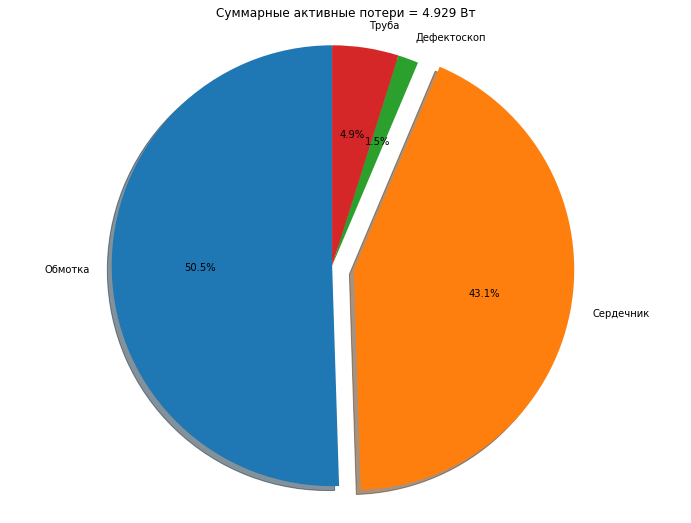

<<<--- Сердечник=1010 Steel, Провод(1.9), R=1.014 Ом, L=26.526 мГн
<<<  1st step  (2.000 mm) x 163 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.415 Ом, (163витков)
        Длина провода = 75.79, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 5.01e-03 А/м
<<<  2nd step  (2.0 mm) x 163 витков  >>>

        NominalCurrent = Ufund = 2.719 А,
        PowerLossRealExp=94.405 Вт, PowerLossApparentExp = 115.285 Вт,
        WireDiameter = 2.000
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.66e-01 А/м


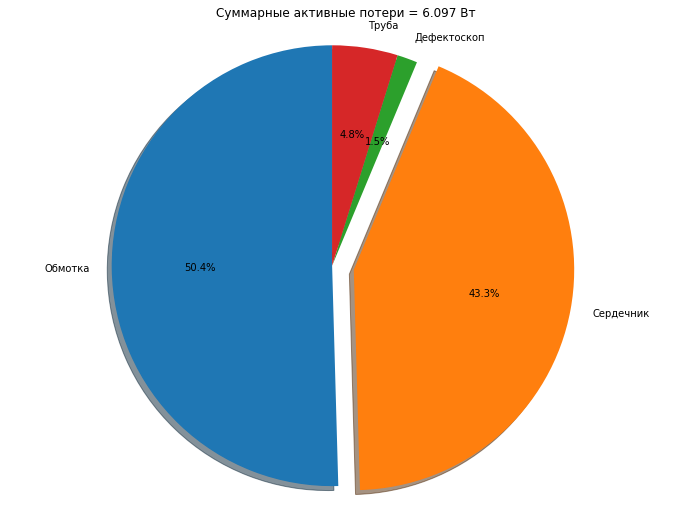

<<<--- Сердечник=1010 Steel, Провод(2), R=0.825 Ом, L=21.443 мГн
<<<  1st step  (2.120 mm) x 145 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.329 Ом, (145витков)
        Длина провода = 67.42, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.46e-03 А/м
<<<  2nd step  (2.1200000000000006 mm) x 145 витков  >>>

        NominalCurrent = Ufund = 3.435 А,
        PowerLossRealExp=119.313 Вт, PowerLossApparentExp = 145.674 Вт,
        WireDiameter = 2.120
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.97e-01 А/м


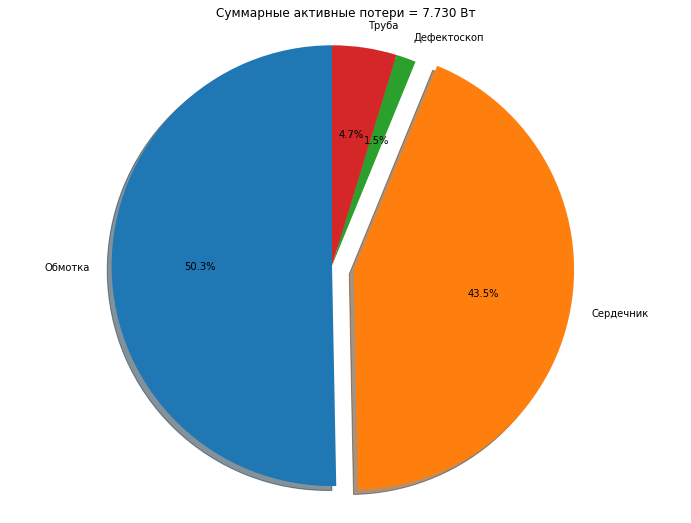

<<<--- Сердечник=1010 Steel, Провод(2.12), R=0.655 Ом, L=16.893 мГн
<<<  1st step  (2.240 mm) x 130 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.264 Ом, (130витков)
        Длина провода = 60.44, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.00e-03 А/м
<<<  2nd step  (2.24 mm) x 130 витков  >>>

        NominalCurrent = Ufund = 4.274 А,
        PowerLossRealExp=148.405 Вт, PowerLossApparentExp = 181.250 Вт,
        WireDiameter = 2.240
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.29e-01 А/м


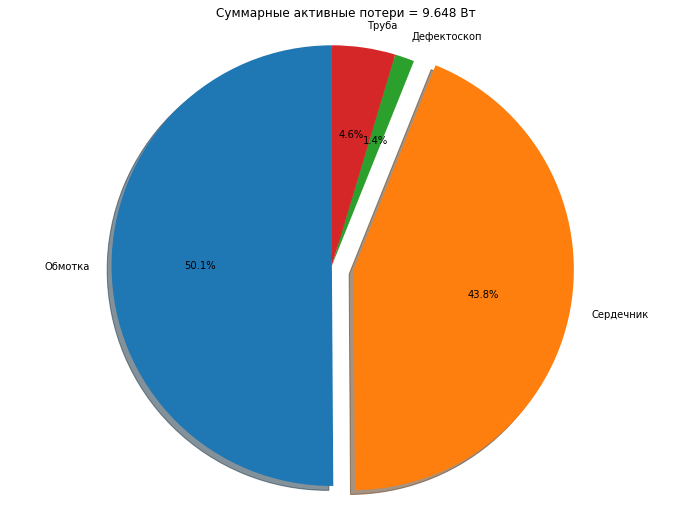

<<<--- Сердечник=1010 Steel, Провод(2.24), R=0.528 Ом, L=13.508 мГн
<<<  1st step  (2.360 mm) x 117 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.214 Ом, (117витков)
        Длина провода = 54.40, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.60e-03 А/м
<<<  2nd step  (2.3600000000000003 mm) x 117 витков  >>>

        NominalCurrent = Ufund = 5.277 А,
        PowerLossRealExp=183.261 Вт, PowerLossApparentExp = 223.737 Вт,
        WireDiameter = 2.360
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.62e-01 А/м


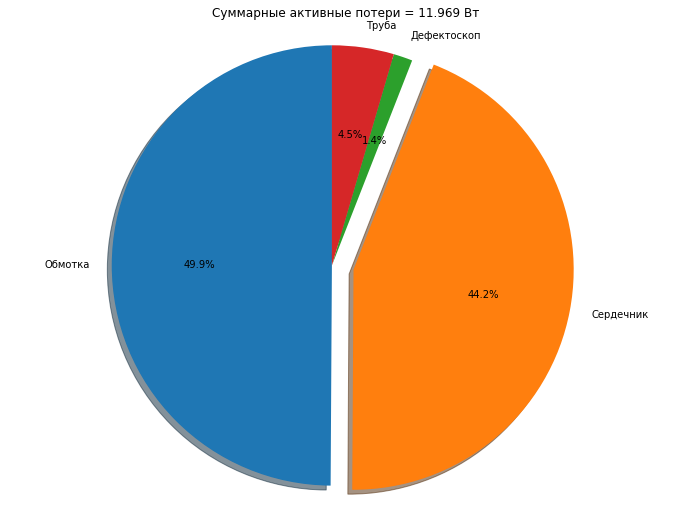

<<<--- Сердечник=1010 Steel, Провод(2.36), R=0.430 Ом, L=10.875 мГн
<<<  1st step  (2.440 mm) x 109 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.186 Ом, (109витков)
        Длина провода = 50.68, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.35e-03 А/м
<<<  2nd step  (2.44 mm) x 109 витков  >>>

        NominalCurrent = Ufund = 6.079 А,
        PowerLossRealExp=211.355 Вт, PowerLossApparentExp = 257.649 Вт,
        WireDiameter = 2.440
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.86e-01 А/м


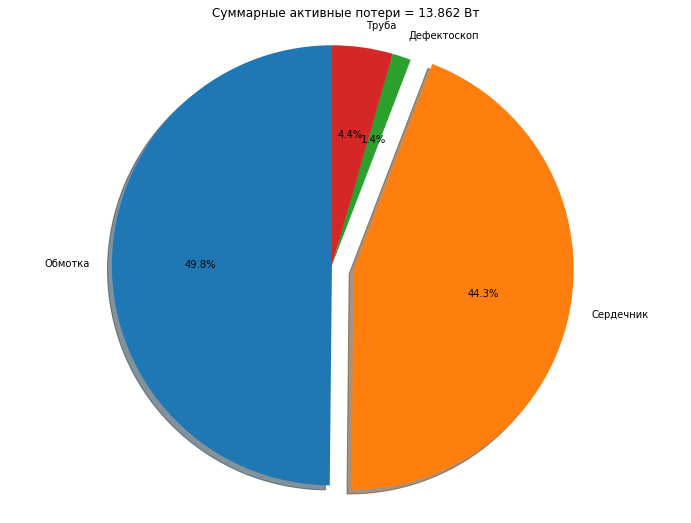

<<<--- Сердечник=1010 Steel, Провод(2.44), R=0.375 Ом, L=9.394 мГн
<<<  1st step  (2.500 mm) x 104 витков  >>>
        Материалы = {'Сердечник': '1010 Steel', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 0.169 Ом, (104витков)
        Длина провода = 48.36, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 3.20e-03 А/м
<<<  2nd step  (2.5 mm) x 104 витков  >>>

        NominalCurrent = Ufund = 6.678 А,
        PowerLossRealExp=232.080 Вт, PowerLossApparentExp = 283.075 Вт,
        WireDiameter = 2.500
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-700_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.02e-01 А/м


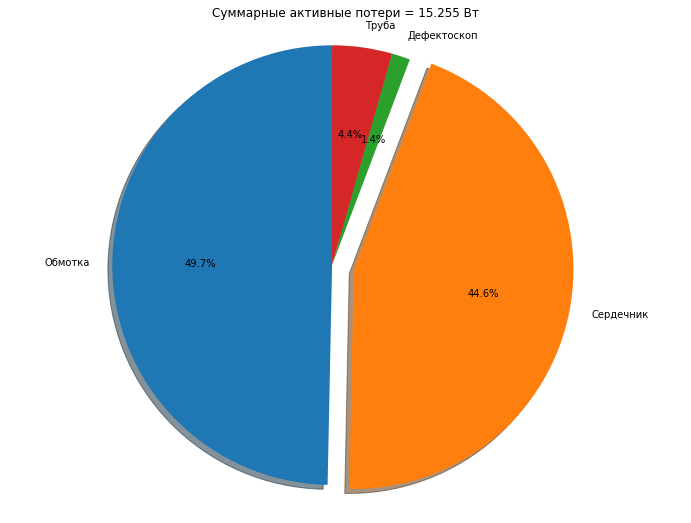

<<<--- Сердечник=1010 Steel, Провод(2.5), R=0.342 Ом, L=8.522 мГн


In [8]:
# # Циклический расчёт
# for CoreMaterial in ['12H18N10T','1010 Steel']:
#     for WideDiam in OZO500_700.Coil.Wire.DiameterList[40:70]:
#         OZO500_700.Coil.Wire.Diameter = WideDiam*1e-3
# #             OZO154.Мaterials['Сердечник'] = CoreMaterial
#         OZO500_700.Мaterials = {'Сердечник': CoreMaterial, 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
#         CoilFieldIntensityAt1m, CoilInductatce, ActiveImpedanceNames, ActiveImpedance, ActivePowerLoss,\
#         CoilVoltageDrop, NominalCurrent, PowerLossRealExp = OZO500_700.CalculateModel2Steps()
#         [R, L] = [sum(ActiveImpedance), CoilInductatce]
#         print(f'<<<--- Сердечник={CoreMaterial}, Провод({WideDiam}), R={R:.3f} Ом, L={L*1000:.3f} мГн')
#         d['Материал сердечника'].append(CoreMaterial);
#         d['Диаметр провода, мм'].append(WideDiam);d['H(1 м), А/м'].append(round(CoilFieldIntensityAt1m,5));
#         d['Активные потери, Вт'].append(round(sum(ActivePowerLoss),3))
#         d['R, Ом'].append(round(R,3)); d['L, мГн'].append(round(L*1000,5))

In [10]:
d500_700 = {'Материал сердечника': ['12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel'],
 'Диаметр провода, мм': [0.77,0.8,0.83,0.85,0.9,0.93,0.95,1,1.06,1.08,1.12,1.18,1.25,1.32,1.4,1.45,1.5,1.56,1.6,1.7,1.8,1.9,2,2.12,2.24,2.36,2.44,2.5,0.77,0.8,0.83,0.85,0.9,0.93,0.95,1,1.06,1.08,1.12,1.18,1.25,1.32,1.4,1.45,1.5,1.56,1.6,1.7,1.8,1.9,2,2.12,2.24,2.36,2.44,2.5],
 'H(1 м), А/м': [0.05107,0.05511,0.05934,0.06221,0.06974,0.07442,0.07759,0.08596,0.09651,0.1001,0.10769,0.11948,0.13382,0.14886,0.16714,0.17862,0.19108,0.20612,0.21616,0.24235,0.2703,0.29762,0.32696,0.3623,0.39769,0.43398,0.45949,0.47704,0.04027,0.04346,0.0468,0.04907,0.05502,0.05873,0.06124,0.06787,0.07624,0.07908,0.08513,0.09451,0.10597,0.11801,0.13273,0.142,0.15211,0.16437,0.17258,0.19417,0.21753,0.24065,0.26592,0.29693,0.32865,0.36188,0.38566,0.40215],
 'Активные потери, Вт': [0.244,0.284,0.329,0.362,0.455,0.519,0.564,0.693,0.874,0.941,1.09,1.345,1.691,2.097,2.656,3.038,3.491,4.079,4.497,5.698,7.173,8.778,10.755,13.459,16.555,20.203,23.119,25.218,0.132,0.153,0.178,0.195,0.246,0.28,0.304,0.374,0.473,0.509,0.59,0.729,0.918,1.14,1.448,1.659,1.911,2.239,2.473,3.152,3.996,4.929,6.097,7.73,9.648,11.969,13.862,15.255],
 'R, Ом': [33.708,28.934,24.952,22.688,18.038,15.824,14.545,11.834,9.367,8.698,7.503,6.077,4.821,3.873,3.05,2.654,2.306,1.966,1.776,1.388,1.094,0.88,0.709,0.556,0.442,0.354,0.305,0.276,37.307,32.027,27.622,25.119,19.977,17.531,16.117,13.12,10.393,9.654,8.333,6.757,5.369,4.322,3.412,2.974,2.59,2.214,2.004,1.576,1.25,1.014,0.825,0.655,0.528,0.43,0.375,0.342],
 'L, мГн': [678.88573,582.77503,502.42921,456.87405,363.17552,318.65453,293.0114,238.32275,188.61155,175.20277,151.0248,122.26467,96.99098,77.93911,61.32416,53.40721,46.35467,39.49436,35.6945,27.89804,21.93118,17.66033,14.20041,11.10571,8.80861,7.02842,6.03182,5.44728,997.80768,856.61678,738.59126,671.67436,534.04185,468.64619,430.97969,350.64877,277.62916,257.93338,222.41874,180.17317,143.04831,115.06238,90.65597,79.02679,68.66728,58.59074,53.00981,41.55973,32.79715,26.52575,21.44325,16.89307,13.50841,10.87527,9.39392,8.5219]}

# d500_700 = {'Материал сердечника': ['12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','12H18N10T','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel','1010 Steel'],
#  'Диаметр провода, мм': [0.77,0.8,0.83,0.85,0.9,0.93,0.95,1,1.06,1.08,1.12,1.18,1.25,1.32,1.4,1.45,1.5,1.56,1.6,1.7,1.8,1.9,2,2.12,2.24,2.36,2.44,2.5,0.77,0.8,0.83,0.85,0.9,0.93,0.95,1,1.06,1.08,1.12,1.18,1.25,1.32,1.4,1.45,1.5,1.56,1.6,1.7,1.8,1.9,2,2.12,2.24,2.36,2.44,2.5],
#  'H(1 м), А/м': [0.02822,0.03046,0.0328,0.03439,0.03856,0.04116,0.04292,0.04756,0.05343,0.05543,0.05966,0.06624,0.07427,0.08273,0.09306,0.09958,0.10668,0.1153,0.12108,0.13628,0.15273,0.16905,0.18688,0.2088,0.23128,0.25488,0.27181,0.28362,0.02295,0.02477,0.02667,0.02797,0.03136,0.03348,0.03491,0.0387,0.04348,0.04511,0.04856,0.05394,0.0605,0.06742,0.0759,0.08125,0.0871,0.09421,0.09898,0.11159,0.12532,0.13901,0.15412,0.17288,0.19236,0.2131,0.22818,0.23875],
#  'Активные потери, Вт': [0.255,0.297,0.344,0.379,0.476,0.542,0.59,0.725,0.915,0.984,1.142,1.409,1.773,2.202,2.793,3.197,3.679,4.307,4.752,6.04,7.635,9.379,11.552,14.553,18.026,22.169,25.52,27.939,0.143,0.167,0.194,0.213,0.268,0.306,0.332,0.408,0.516,0.555,0.644,0.795,1.002,1.245,1.581,1.812,2.088,2.448,2.704,3.449,4.378,5.404,6.695,8.504,10.637,13.232,15.365,16.933],
#  'R, Ом': [26.938,23.124,19.944,18.135,14.422,12.654,11.631,9.467,7.496,6.961,6.008,4.87,3.867,3.11,2.453,2.136,1.859,1.587,1.435,1.125,0.89,0.719,0.583,0.46,0.368,0.297,0.258,0.234,29.805,25.586,22.069,20.069,15.962,14.007,12.877,10.483,8.305,7.714,6.66,5.402,4.293,3.456,2.73,2.38,2.073,1.773,1.605,1.263,1.003,0.814,0.663,0.528,0.426,0.348,0.305,0.278],
#  'L, мГн': [600.12194,515.19073,444.1923,403.93791,321.14497,281.80743,259.15034,210.83091,166.91021,155.06349,133.70225,108.293,85.96429,69.13253,54.45379,47.45951,41.22881,35.16798,31.81094,24.92286,19.65052,15.87601,12.81637,10.07652,8.03855,6.45414,5.56391,5.04038,858.03324,736.63108,635.1481,577.61088,459.27277,403.04657,370.66215,301.59795,238.82215,221.89001,191.35931,155.04352,123.13092,99.07499,78.0965,68.10085,59.19653,50.53544,45.73846,35.89666,28.36466,22.97383,18.60463,14.69251,11.78167,9.51597,8.24046,7.48919]}
# d

In [11]:
import pandas as pd
dF500_700 = pd.DataFrame(d500_700)
dF500_700_12H18N10T = dF500_700[dF500_700['Материал сердечника'] == '12H18N10T']
dF500_700_1010Steel = dF500_700[dF500_700['Материал сердечника'] == '1010 Steel']

# d500_700['Материал сердечника']
dF500_700_12H18N10T.head()

,Материал сердечника,"Диаметр провода, мм","H(1 м), А/м","Активные потери, Вт","R, Ом","L, мГн"
0,12H18N10T,0.77,0.05107,0.244,33.708,678.88573
1,12H18N10T,0.80,0.05511,0.284,28.934,582.77503
2,12H18N10T,0.83,0.05934,0.329,24.952,502.42921
3,12H18N10T,0.85,0.06221,0.362,22.688,456.87405
4,12H18N10T,0.90,0.06974,0.455,18.038,363.17552


In [12]:
dF500_700_1010Steel.head()

,Материал сердечника,"Диаметр провода, мм","H(1 м), А/м","Активные потери, Вт","R, Ом","L, мГн"
28,1010 Steel,0.77,0.04027,0.132,37.307,997.80768
29,1010 Steel,0.80,0.04346,0.153,32.027,856.61678
30,1010 Steel,0.83,0.04680,0.178,27.622,738.59126
31,1010 Steel,0.85,0.04907,0.195,25.119,671.67436
32,1010 Steel,0.90,0.05502,0.246,19.977,534.04185


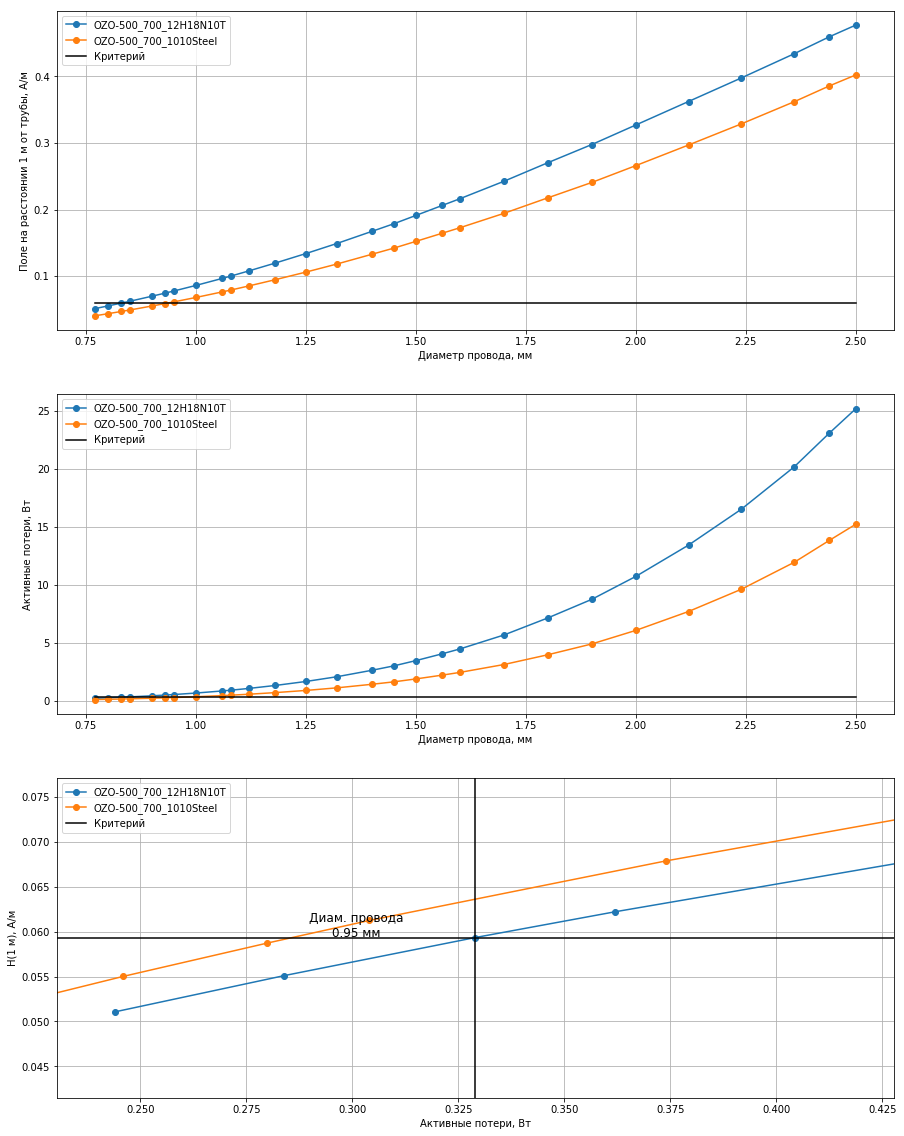

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Эталоны
Pd = 0.329
H1m = 5.93e-02

# with plt.xkcd():
fig , ax = plt.subplots(3,1, figsize=(15, 20))
# ax[0].set_title(f'Выбор провода по Сигналу и Потреблению.\n{OZO219.Мaterials}')
ax[0].set_ylabel('Поле на расстоянии 1 м от трубы, А/м')
ax[0].grid()
ax[1].set_ylabel('Активные потери, Вт')
ax[1].grid()
for i in range(2): ax[i].set_xlabel('Диаметр провода, мм')

ax[2].set_ylabel('H(1 м), А/м')
ax[2].set_xlabel('Активные потери, Вт')
ax[2].grid()
# for Data in d500_700:

ax[0].plot(dF500_700_12H18N10T['Диаметр провода, мм'], dF500_700_12H18N10T['H(1 м), А/м'],'o-')
ax[1].plot(dF500_700_12H18N10T['Диаметр провода, мм'], dF500_700_12H18N10T['Активные потери, Вт'],'o-')
ax[2].plot(dF500_700_12H18N10T['Активные потери, Вт'], dF500_700_12H18N10T['H(1 м), А/м'],'o-')

ax[0].plot(dF500_700_1010Steel['Диаметр провода, мм'], dF500_700_1010Steel['H(1 м), А/м'],'o-')
ax[1].plot(dF500_700_1010Steel['Диаметр провода, мм'], dF500_700_1010Steel['Активные потери, Вт'],'o-')
ax[2].plot(dF500_700_1010Steel['Активные потери, Вт'], dF500_700_1010Steel['H(1 м), А/м'],'o-')

ax[0].plot(dF500_700_1010Steel['Диаметр провода, мм'], [H1m for i in dF500_700_1010Steel['Диаметр провода, мм']],'k-')
ax[1].plot(dF500_700_1010Steel['Диаметр провода, мм'], [Pd for i in dF500_700_1010Steel['Активные потери, Вт']],'k-')
ax[2].plot(dF500_700_1010Steel['Активные потери, Вт'], [H1m for i in dF500_700_1010Steel['Диаметр провода, мм']],'k-')
ax[2].plot([Pd for i in dF500_700_1010Steel['Активные потери, Вт']], dF500_700_1010Steel['H(1 м), А/м'],'k-')
ax[2].set_xlim(Pd*.7,Pd*1.3)
ax[2].set_ylim(H1m*.7,H1m*1.3)

p = 34
ax[2].text(.99*dF500_700_1010Steel['Активные потери, Вт'][p],.99*dF500_700_1010Steel['H(1 м), А/м'][p],
           f"Диам. провода\n{dF500_700_1010Steel['Диаметр провода, мм'][p]} мм", fontsize=12,
           horizontalalignment='center', verticalalignment='center')

for i in range(3): ax[i].legend((f'OZO-500_700_12H18N10T',
                                 'OZO-500_700_1010Steel',
                                 'Критерий'))

In [19]:
i=34
(dF500_700_1010Steel['Диаметр провода, мм'][i],
dF500_700_1010Steel['Активные потери, Вт'][i],dF500_700_1010Steel['H(1 м), А/м'][i])

(0.95, 0.304, 0.06124)

In [20]:
j=2
(dF500_700_12H18N10T['Диаметр провода, мм'][j],
dF500_700_12H18N10T['Активные потери, Вт'][j],dF500_700_12H18N10T['H(1 м), А/м'][j])

(0.83, 0.329, 0.05934)

In [21]:
print(f"""Вывод: если заменить материал сердечника с 12Х18Н10Т (провод 0,83 мм) на сталь 10 (провод 0,95 мм),
то это приведёт к следующим изменениям:
- снижению потерь в {dF500_700_12H18N10T['Активные потери, Вт'][j]/dF500_700_1010Steel['Активные потери, Вт'][i]:0.3} раза
- росту поля в {dF500_700_1010Steel['H(1 м), А/м'][i]/dF500_700_12H18N10T['H(1 м), А/м'][j]:0.3} раза
""")

Вывод: если заменить материал сердечника с 12Х18Н10Т (провод 0,83 мм) на сталь 10 (провод 0,95 мм),
то это приведёт к следующим изменениям:
- снижению потерь в 1.08 раза
- росту поля в 1.03 раза



# 2 ОЗО-500-273
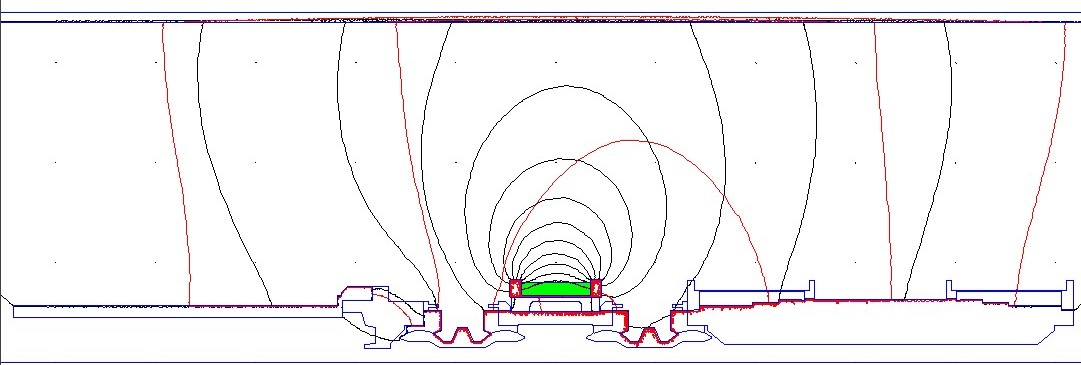

**Результаты и обсуждение**

1)  
    + Мощность активных потерь =  Вт
    + Напряжённость магнитного поля на расстоянии 1 м от трубы =  А/м

Без учёта корпусов дефектоскопа эти праметры равны 0.328 Вт и 2.97e-02 А/м соответственно. Таким образом, корпуса дефектоскопов увеличиваю напряжённость поля на 10%.

In [30]:
from ozo_class import *
# ============================ OZO. Создание объекта на 700 мм =============================
Coil500 = Coil(OuterDiameter = 0.161, InnerDiameter = 0.135, Length = 0.069, WireDiameter = 0.83e-3,
               PipeOuterDiameter = 0.700, PipeWall = 0.010)
OZO500_273 = OZO(ModelName = 'OZO500\OZO-500-273.FEM', Voltage = 12, Coil = Coil500,
            Мaterials = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'},meshsize = 1)

<<<  1st step  (0.830 mm) x 949 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 14.0 Ом, (949витков)
        Длина провода = 441.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.31e-02 А/м
<<<  2nd step  (0.83 mm) x 949 витков  >>>

        NominalCurrent = Ufund = 0.155 А,
        PowerLossRealExp=6.607 Вт, PowerLossApparentExp = 6.007 Вт,
        WireDiameter = 0.830
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.15e-02 А/м


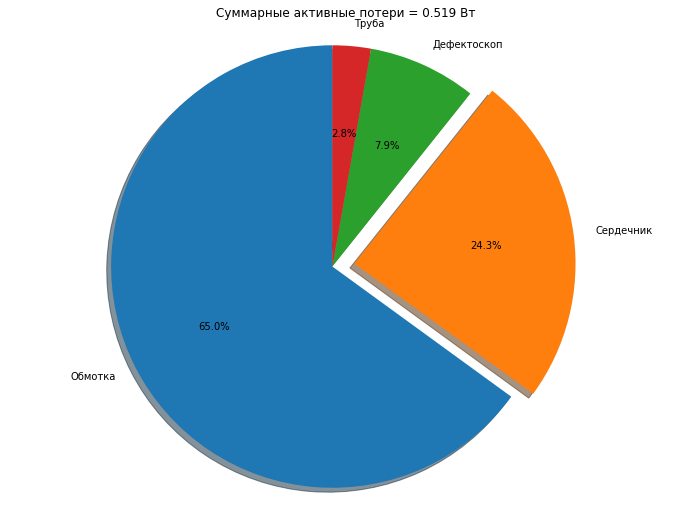

In [31]:
%matplotlib inline
CoilFieldIntensityAt1m, CoilInductatce, ActiveImpedanceNames, ActiveImpedance, ActivePowerLoss,\
CoilVoltageDrop, NominalCurrent, PowerLossRealExp = OZO500_273.CalculateModel2Steps()

In [32]:
OZO500_273.printTZ()

----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.15e-02 А/м

1. Материалы
    ['Сердечник: 12H18N10T', 'Дефектоскоп: 1010 Steel', 'Труба: 17G1S']
2. Геометрические параметры ОЗО
    2.1 Катушка
        Внешний диаметр катушки = 161.0 мм
        Внутренний диаметр катушки = 135.0 мм
        Длина катушки = 69.0 мм
    2.2 Труба
        Внешний диаметр трубы = 700.0 мм
        Толщина стенки = 10.0 мм
3. Параметры обмотки
        Диаметр провода = 0.83 мм
        Количество витков = 949
        Длина провода = 441.2 м
4. Источник питания
        Частота = 22 Гц
        Амплитуда напряжения = 12 В
5. Параметры ОЗО
    5.1 Импеданс излучателя в трубе на снаряде
        Активный = 21.636 Ом
        Индуктивный = 364.016 мГн
    5.2 Мощность активных потерь = 0.519 Вт (критерий < 0.329 Вт)
    5.3 Напряжённость магнитного поля на расстоянии 1 м от трубы = 7.15e-02 А/м (критерий > 5.93e-02 А/м)



<<<  1st step  (0.830 mm) x 949 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 14.0 Ом, (949витков)
        Длина провода = 441.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.31e-02 А/м
<<<  2nd step  (0.83 mm) x 949 витков  >>>

        NominalCurrent = Ufund = 0.155 А,
        PowerLossRealExp=6.607 Вт, PowerLossApparentExp = 6.007 Вт,
        WireDiameter = 0.830
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.15e-02 А/м


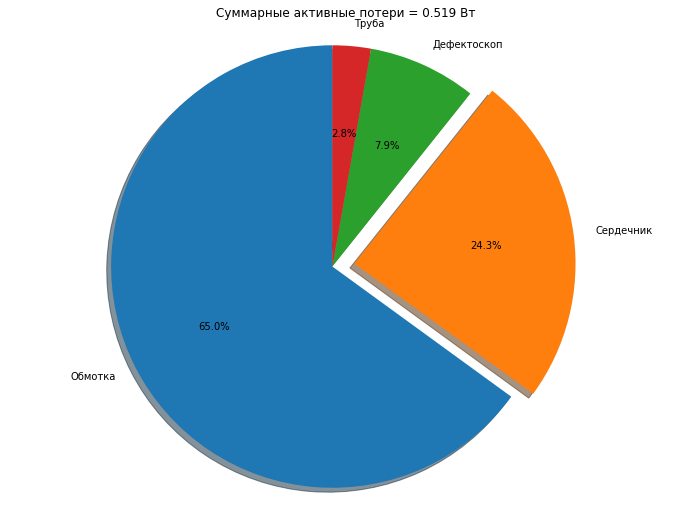

In [39]:
OZO500_273.Мaterials = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
CoilFieldIntensityAt1m, CoilInductatce, ActiveImpedanceNames, ActiveImpedance, ActivePowerLoss,\
CoilVoltageDrop, NominalCurrent, PowerLossRealExp = OZO500_273.CalculateModel2Steps()

In [38]:
OZO500_273.printTZ()

----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 4.61e-02 А/м

1. Материалы
    ['Сердечник: 12H18N10T', 'Дефектоскоп: Air', 'Труба: 17G1S']
2. Геометрические параметры ОЗО
    2.1 Катушка
        Внешний диаметр катушки = 161.0 мм
        Внутренний диаметр катушки = 135.0 мм
        Длина катушки = 69.0 мм
    2.2 Труба
        Внешний диаметр трубы = 700.0 мм
        Толщина стенки = 10.0 мм
3. Параметры обмотки
        Диаметр провода = 0.83 мм
        Количество витков = 949
        Длина провода = 441.2 м
4. Источник питания
        Частота = 22 Гц
        Амплитуда напряжения = 12 В
5. Параметры ОЗО
    5.1 Импеданс излучателя в трубе на снаряде
        Активный = 18.669 Ом
        Индуктивный = 369.495 мГн
    5.2 Мощность активных потерь = 0.454 Вт (критерий < 0.329 Вт)
    5.3 Напряжённость магнитного поля на расстоянии 1 м от трубы = 4.61e-02 А/м (критерий > 5.93e-02 А/м)



## 2.2 Оптимизация обмотки.

In [1]:
from ozo_class import *
# ============================ OZO. Создание объекта на 700 мм =============================
Coil500 = Coil(OuterDiameter = 0.161, InnerDiameter = 0.135, Length = 0.069, WireDiameter = 0.83e-3,
               PipeOuterDiameter = 0.700, PipeWall = 0.010)
OZO500_273 = OZO(ModelName = 'OZO500\OZO-500-273.FEM', Voltage = 12, Coil = Coil500,
            Мaterials = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'},meshsize = 1)
d = {'Материал сердечника':[],'Диаметр провода, мм':[],'H(1 м), А/м':[],'Активные потери, Вт':[],'R, Ом':[],'L, мГн':[]}
print(OZO500_273.Coil.Wire.DiameterList[40:50])

[0.77, 0.8, 0.83, 0.85, 0.9, 0.93, 0.95, 1, 1.06, 1.08]


In [ ]:
# Циклический расчёт
%matplotlib inline

for CoreMaterial in ['12H18N10T','1010 Steel']:
    for WideDiam in OZO500_273.Coil.Wire.DiameterList[40:70]:
        OZO500_273.Coil.Wire.Diameter = WideDiam*1e-3
#             OZO154.Мaterials['Сердечник'] = CoreMaterial
        OZO500_273.Мaterials = {'Сердечник': CoreMaterial, 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        CoilFieldIntensityAt1m, CoilInductatce, ActiveImpedanceNames, ActiveImpedance, ActivePowerLoss,\
        CoilVoltageDrop, NominalCurrent, PowerLossRealExp = OZO500_273.CalculateModel2Steps()
        [R, L] = [sum(ActiveImpedance), CoilInductatce]
        print(f'<<<--- Сердечник={CoreMaterial}, Провод({WideDiam}), R={R:.3f} Ом, L={L*1000:.3f} мГн')
        d['Материал сердечника'].append(CoreMaterial);
        d['Диаметр провода, мм'].append(WideDiam);d['H(1 м), А/м'].append(round(CoilFieldIntensityAt1m,5));
        d['Активные потери, Вт'].append(round(sum(ActivePowerLoss),3))
        d['R, Ом'].append(round(R,3)); d['L, мГн'].append(round(L*1000,5))

<<<  1st step  (0.770 mm) x 1103 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 18.9 Ом, (1103витков)
        Длина провода = 512.85, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.69e-02 А/м
<<<  2nd step  (0.77 mm) x 1103 витков  >>>

        NominalCurrent = Ufund = 0.115 А,
        PowerLossRealExp=4.891 Вт, PowerLossApparentExp = 4.447 Вт,
        WireDiameter = 0.770
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.16e-02 А/м


<Figure size 1200x900 with 1 Axes>

<<<--- Сердечник=12H18N10T, Провод(0.77), R=29.227 Ом, L=491.805 мГн
<<<  1st step  (0.800 mm) x 1022 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 16.3 Ом, (1022витков)
        Длина провода = 475.18, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.49e-02 А/м
<<<  2nd step  (0.8 mm) x 1022 витков  >>>

        NominalCurrent = Ufund = 0.134 А,
        PowerLossRealExp=5.696 Вт, PowerLossApparentExp = 5.180 Вт,
        WireDiameter = 0.800
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 6.64e-02 А/м


<Figure size 1200x900 with 1 Axes>

<<<--- Сердечник=12H18N10T, Провод(0.8), R=25.087 Ом, L=422.202 мГн
<<<  1st step  (0.830 mm) x 949 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 14.0 Ом, (949витков)
        Длина провода = 441.24, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.31e-02 А/м
<<<  2nd step  (0.83 mm) x 949 витков  >>>

        NominalCurrent = Ufund = 0.155 А,
        PowerLossRealExp=6.607 Вт, PowerLossApparentExp = 6.007 Вт,
        WireDiameter = 0.830
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.15e-02 А/м


<Figure size 1200x900 with 1 Axes>

<<<--- Сердечник=12H18N10T, Провод(0.83), R=21.636 Ом, L=364.016 мГн
<<<  1st step  (0.850 mm) x 905 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 12.8 Ом, (905витков)
        Длина провода = 420.78, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 2.20e-02 А/м
<<<  2nd step  (0.85 mm) x 905 витков  >>>

        NominalCurrent = Ufund = 0.170 А,
        PowerLossRealExp=7.265 Вт, PowerLossApparentExp = 6.606 Вт,
        WireDiameter = 0.850
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 7.50e-02 А/м


<Figure size 1200x900 with 1 Axes>

<<<--- Сердечник=12H18N10T, Провод(0.85), R=19.673 Ом, L=331.026 мГн
<<<  1st step  (0.900 mm) x 807 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 10.1 Ом, (807витков)
        Длина провода = 375.22, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.97e-02 А/м
<<<  2nd step  (0.9000000000000001 mm) x 807 витков  >>>

        NominalCurrent = Ufund = 0.214 А,
        PowerLossRealExp=9.137 Вт, PowerLossApparentExp = 8.307 Вт,
        WireDiameter = 0.900
              
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 8.41e-02 А/м


<Figure size 1200x900 with 1 Axes>

<<<--- Сердечник=12H18N10T, Провод(0.9), R=15.643 Ом, L=263.173 мГн
<<<  1st step  (0.930 mm) x 756 витков  >>>
        Материалы = {'Сердечник': '12H18N10T', 'Дефектоскоп': '1010 Steel', 'Труба': '17G1S'}
        Сопротивление обмотки аналитически = 8.9 Ом, (756витков)
        Длина провода = 351.51, Сечение обмотки = 897.0 mm²
        
----- Расчёт окончен! -----
Предварительная модель "OZO500\OZO-500-273_temp.fem" готова (f = 22.0Hz)
----- Постобработка окончена! -----
        Напряжённость поля на расстоянии 1 м от трубы = 1.84e-02 А/м
<<<  2nd step  (0.93 mm) x 756 витков  >>>

        NominalCurrent = Ufund = 0.244 А,
        PowerLossRealExp=10.410 Вт, PowerLossApparentExp = 9.466 Вт,
        WireDiameter = 0.930
              
